In [174]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
# import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

plaan:
* column < 3 & column > 2
* column < 2 & column > 1
* column > 1

VÕI
* column < 3 & column > 1
* column > 1


In [251]:
input_f = 'limesurvey_feature_results_mapped_w_dims.csv'

data = []

with open(input_f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

In [252]:
initial_df = pd.DataFrame(data).iloc[:, 1:].astype(float)

In [254]:
initial_df

,abs,afek,aeg,arg,form,imp,info,inst,inter,keer,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
0,1.35,0.85,0.65,1.55,0.70,1.80,1.10,0.90,0.45,0.50,...,0.0958,0.0539,0.0060,0.0060,0.0479,0.0359,0.0060,0.0419,0.1018,0.0539
1,0.65,1.15,0.70,0.65,0.45,0.65,1.15,0.75,0.70,0.65,...,0.0805,0.0537,0.0034,0.0235,0.0705,0.0268,0.0034,0.0369,0.0369,0.0336
2,1.25,1.65,0.15,1.50,0.15,0.55,0.35,0.60,0.85,0.40,...,0.0823,0.0390,0.0087,0.0087,0.0390,0.0433,0.0043,0.0173,0.0433,0.0433
3,0.60,1.20,0.80,1.85,0.45,1.15,0.65,0.30,0.45,0.05,...,0.1469,0.1119,0.0070,0.0280,0.0909,0.0420,0.0070,0.0210,0.0420,0.0350
4,1.15,0.80,0.40,1.40,0.70,0.75,0.85,0.25,0.20,0.55,...,0.1141,0.0870,0.0109,0.0054,0.0652,0.0217,0.0054,0.0272,0.0543,0.0380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.35,1.25,2.10,0.65,0.15,0.90,0.70,0.75,1.70,0.25,...,0.1263,0.0538,0.0054,0.0027,0.0430,0.0134,0.0027,0.0269,0.0457,0.0457
116,0.50,1.40,0.60,1.50,0.55,0.85,1.20,0.40,0.55,0.10,...,0.1338,0.0892,0.0191,0.0318,0.0510,0.0446,0.0064,0.0318,0.0318,0.0318
117,0.10,0.80,2.60,0.55,0.85,0.95,2.10,0.80,0.65,1.00,...,0.1240,0.0800,0.0120,0.0320,0.0480,0.0040,0.0040,0.0160,0.0720,0.0440
118,0.40,0.60,0.35,0.50,0.55,1.60,1.85,2.65,0.70,0.25,...,0.1579,0.1667,0.0088,0.0439,0.0263,0.0088,0.0088,0.0263,0.1140,0.0702


In [243]:
feature_names = [
    'noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'num', 'punct', 'symbol',
    'particle', 'pron', 'abbr', 'TTR', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'coref', 'see_pron', 'see_det',
    'first_pron', 'second_pron', 'third_pron', 'active_voice', 'passive_voice', 'first_prs_verb', 'second_prs_verb', 'third_prs_verb',
    'core_verb', 'verbtype_ratio', 'da_inf', 'gerund', 'supine', 'verb_particle', 'pres_tense', 'past_tense',
    'ind_mood', 'cond_mood', 'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case', 'part_case', 'ill_case',
    'ine_case', 'ela_case', 'alla_case', 'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case',
    'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl_relc', 'csubj', 'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod',
    'appos', 'nummod', 'amod', 'advcl', 'voc', 'cop', 'conj', 'cc'   
]

In [8]:
def make_new_df(original_dataframe, dim_name, conditions):
    if conditions == 3:
        dim_present = initial_df.loc[(initial_df[dim_name] < 3) & (initial_df[dim_name] > 2), feature_names]
        dim_mildly_present = initial_df.loc[(initial_df[dim_name] < 2) & (initial_df[dim_name] > 1), feature_names]
        dim_not_present = initial_df.loc[initial_df[dim_name] < 1, feature_names]
        return dim_present, dim_mildly_present, dim_not_present
    else:
        dim_present = initial_df.loc[(initial_df[dim_name] < 3) & (initial_df[dim_name] > 1), feature_names]
        dim_not_present = initial_df.loc[initial_df[dim_name] < 1, feature_names]
        return dim_present, dim_not_present

In [9]:
def save_csv(prefix, sufix, df):
    df.to_csv(f'korrelatsiooni_csvd/{prefix}_{sufix}.csv')

In [10]:
def save_heatmap(hmap, f):
    hmap.figure.savefig(f'heatmapid/{f}_heatmap.png', format='png', dpi=150)

In [11]:
def generate_plot(dim, df, features):
    fig, axs = plt.subplots(ncols=2, figsize=(25, 300))
    plt.subplots_adjust(hspace=0.5)

    for i, feature in enumerate(features):
        df_mean = np.mean(df[str(feature)])
        df_std = np.std(df[str(feature)])
        pdf = stats.norm.pdf(df[str(feature)].sort_values(), df_mean, df_std)
    
        ax = plt.subplot(38, 2, i+1)
        plt.plot(df[str(feature)].sort_values(), pdf, label = str(feature))
        plt.legend(loc=1, prop={'size': 20})

        plt.savefig(f'normdist_plots/{dim}.pdf')

In [286]:
def plot_important_features(model, dimname):
    
    print(model.coef_)

    feature_importance = abs(model.coef_[0])
    
    
    feature_importance = 1.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(15,20))
    featax = featfig.add_subplot(1, 1, 1)

    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
    featax.set_xlabel(f'Relative Feature Importance {str.upper(dimname)}')

    # plt.tight_layout()   
    plt.show()

## ABSTRAKTNE

In [20]:
abs_df, abs_not_df = make_new_df(initial_df, 'abs', 2)

# generate_plot('abs', abs_df, feature_names)

In [11]:
abs_corr = abs_df.corr(method='pearson').round(2)
save_csv('abs', 'present', abs_corr)
abs_corr


,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.65,0.32,-0.71,-0.13,-0.14,-0.16,0.51,0.11,0.50,...,0.33,0.80,0.19,0.52,0.55,0.10,0.41,-0.05,0.06,-0.14
adj,0.65,1.00,0.34,-0.27,0.02,-0.05,-0.27,0.11,-0.07,0.08,...,0.38,0.46,0.37,0.06,0.79,-0.23,0.36,-0.14,0.03,-0.05
propn,0.32,0.34,1.00,-0.37,0.07,-0.20,-0.22,0.30,-0.06,0.13,...,0.33,0.69,0.33,0.13,0.48,-0.21,0.24,-0.42,-0.05,-0.20
adv,-0.71,-0.27,-0.37,1.00,-0.00,0.21,-0.04,-0.39,-0.09,-0.36,...,-0.39,-0.70,0.06,-0.41,-0.19,-0.31,-0.29,0.31,0.04,0.21
intj,-0.13,0.02,0.07,-0.00,1.00,-0.03,-0.22,-0.01,-0.22,0.14,...,0.05,-0.06,0.28,0.13,-0.10,-0.17,0.51,-0.02,-0.09,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.10,-0.23,-0.21,-0.31,-0.17,-0.28,0.65,0.03,0.15,0.03,...,0.04,0.01,-0.15,0.15,-0.14,1.00,0.24,-0.05,-0.33,-0.28
voc,0.41,0.36,0.24,-0.29,0.51,-0.26,-0.07,0.22,0.06,0.30,...,0.25,0.31,0.55,0.33,0.23,0.24,1.00,0.01,-0.12,-0.26
cop,-0.05,-0.14,-0.42,0.31,-0.02,0.25,-0.30,-0.28,0.27,-0.23,...,-0.58,-0.22,0.07,-0.27,-0.31,-0.05,0.01,1.00,0.34,0.25
conj,0.06,0.03,-0.05,0.04,-0.09,0.66,-0.58,-0.03,0.17,-0.21,...,-0.41,-0.07,-0.04,-0.21,0.06,-0.33,-0.12,0.34,1.00,0.66


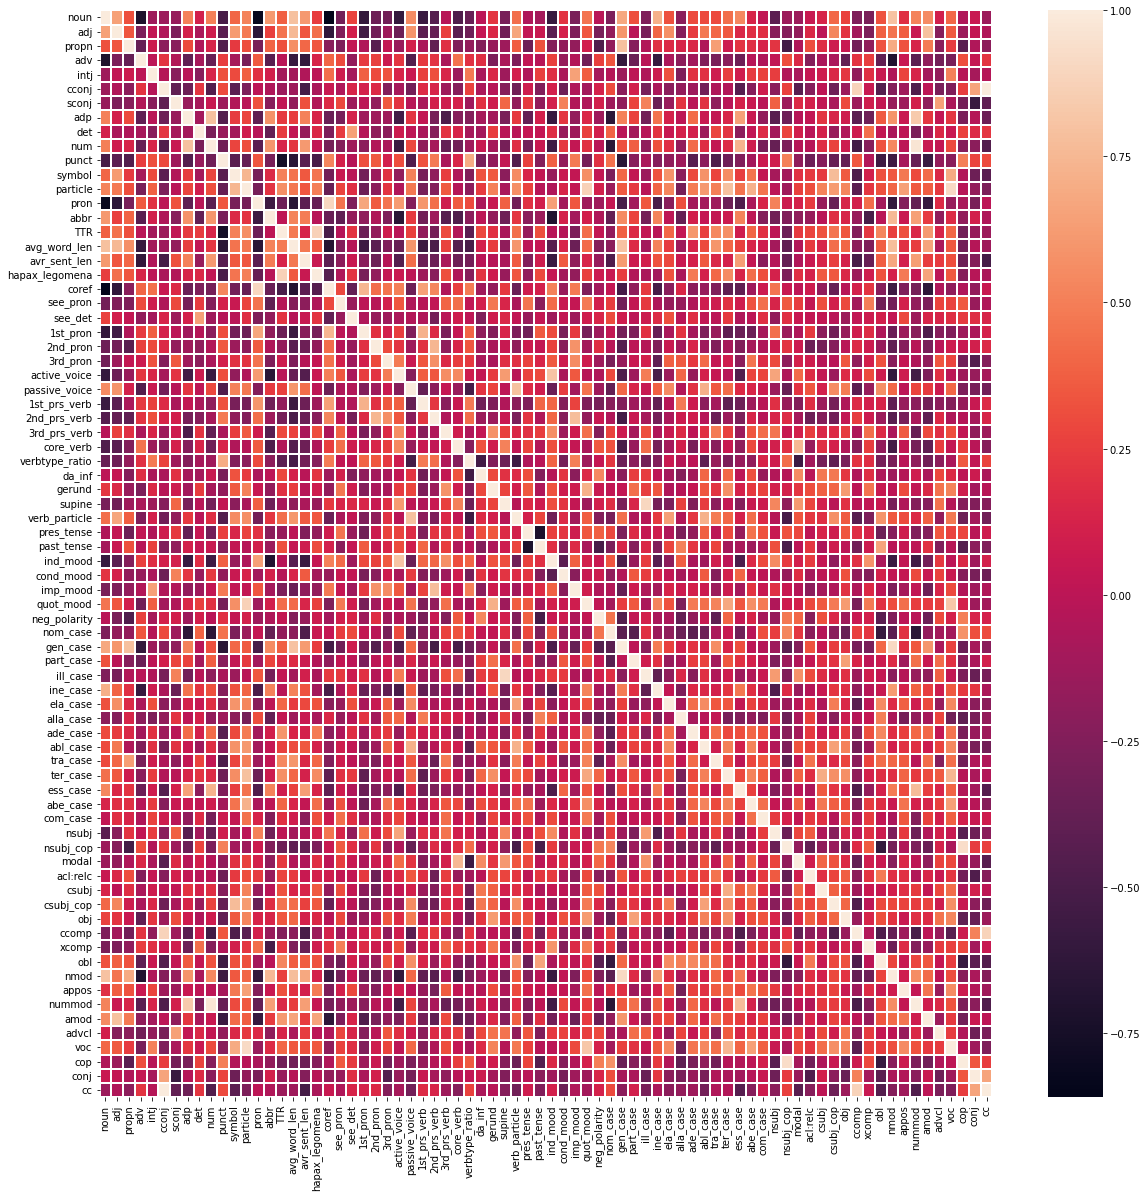

In [12]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(abs_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, 'abs')

In [13]:
abs_corr2 = abs_not_df.corr(method='pearson').round(2)
save_csv('abs', 'not_present', abs_corr2)

abs_corr2

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.24,0.01,-0.56,0.23,0.18,-0.21,0.14,-0.13,-0.01,...,0.17,0.65,0.20,0.12,0.20,-0.11,0.36,-0.30,0.27,0.18
adj,0.24,1.00,-0.06,-0.25,0.34,0.12,-0.04,-0.16,-0.12,-0.02,...,0.18,0.02,-0.07,0.12,0.76,0.11,0.38,0.04,0.20,0.12
propn,0.01,-0.06,1.00,-0.39,0.26,0.02,-0.39,-0.12,-0.27,0.22,...,0.42,0.45,0.66,0.25,0.10,-0.41,0.38,-0.23,-0.03,0.01
adv,-0.56,-0.25,-0.39,1.00,-0.21,-0.15,0.33,-0.06,0.03,-0.26,...,-0.42,-0.45,-0.38,-0.30,-0.23,0.34,-0.34,0.17,-0.29,-0.15
intj,0.23,0.34,0.26,-0.21,1.00,0.30,0.07,0.02,-0.06,-0.01,...,0.27,0.27,0.35,0.07,0.34,0.13,0.84,0.04,0.15,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,-0.11,0.11,-0.41,0.34,0.13,-0.01,0.64,0.12,0.02,-0.30,...,-0.11,-0.32,-0.19,-0.29,0.12,1.00,0.07,0.07,-0.15,-0.01
voc,0.36,0.38,0.38,-0.34,0.84,0.29,-0.06,0.10,-0.09,0.10,...,0.40,0.39,0.42,0.21,0.42,0.07,1.00,-0.00,0.17,0.29
cop,-0.30,0.04,-0.23,0.17,0.04,0.01,0.09,-0.06,0.17,-0.01,...,-0.26,-0.33,-0.13,-0.00,-0.19,0.07,-0.00,1.00,0.05,0.01
conj,0.27,0.20,-0.03,-0.29,0.15,0.62,-0.32,-0.09,-0.23,0.02,...,-0.25,-0.00,-0.06,0.02,0.02,-0.15,0.17,0.05,1.00,0.62


In [ ]:
fig,ax = plt.subplots(1,1,figsize=(30,30))
hmap = sns.heatmap(abs_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, 'not_abs')


### LOGISTILINE REGRESSIOON

In [256]:
feats = [*feature_names]

[[-4.45398959e-01 -1.47662783e-01 -1.06253357e-01  2.62189866e-01
  -9.75298193e-03  8.46011916e-02  9.65356333e-02 -7.42670844e-02
   7.31783770e-02 -2.61122009e-01  1.07260117e-02 -9.93730752e-03
  -7.80295780e-03  1.55913693e-01  1.94677814e-02 -1.45145979e-01
  -3.09029049e-01  1.96161356e-02 -5.42546967e-01  1.38443154e+00
   9.91225791e-02  3.34999021e-02  1.98747506e-02  1.42278432e-02
  -6.59255252e-02  2.34494227e-02  9.53015939e-03  1.56852477e-02
  -5.89511586e-02 -4.75536082e-02  1.04232379e-01 -5.27524170e-02
   1.03266559e-01 -1.44468521e-02  2.80638457e-02 -9.35513461e-02
   3.04045358e-01 -3.06875369e-01  1.04864311e-01  3.92678069e-02
  -7.56533642e-02 -6.60625816e-03  1.34560185e-01 -3.33374870e-01
  -1.21812239e-01  1.86706154e-01  9.95161067e-04  4.51504602e-02
   3.73331983e-02 -6.77543606e-02 -2.29099681e-01 -1.74129705e-02
   3.26399521e-02 -2.27949381e-02 -2.04758857e-03 -2.60198729e-02
  -1.06208752e-01 -8.18884504e-02  4.36853629e-02  1.38657172e-01
  -3.32215

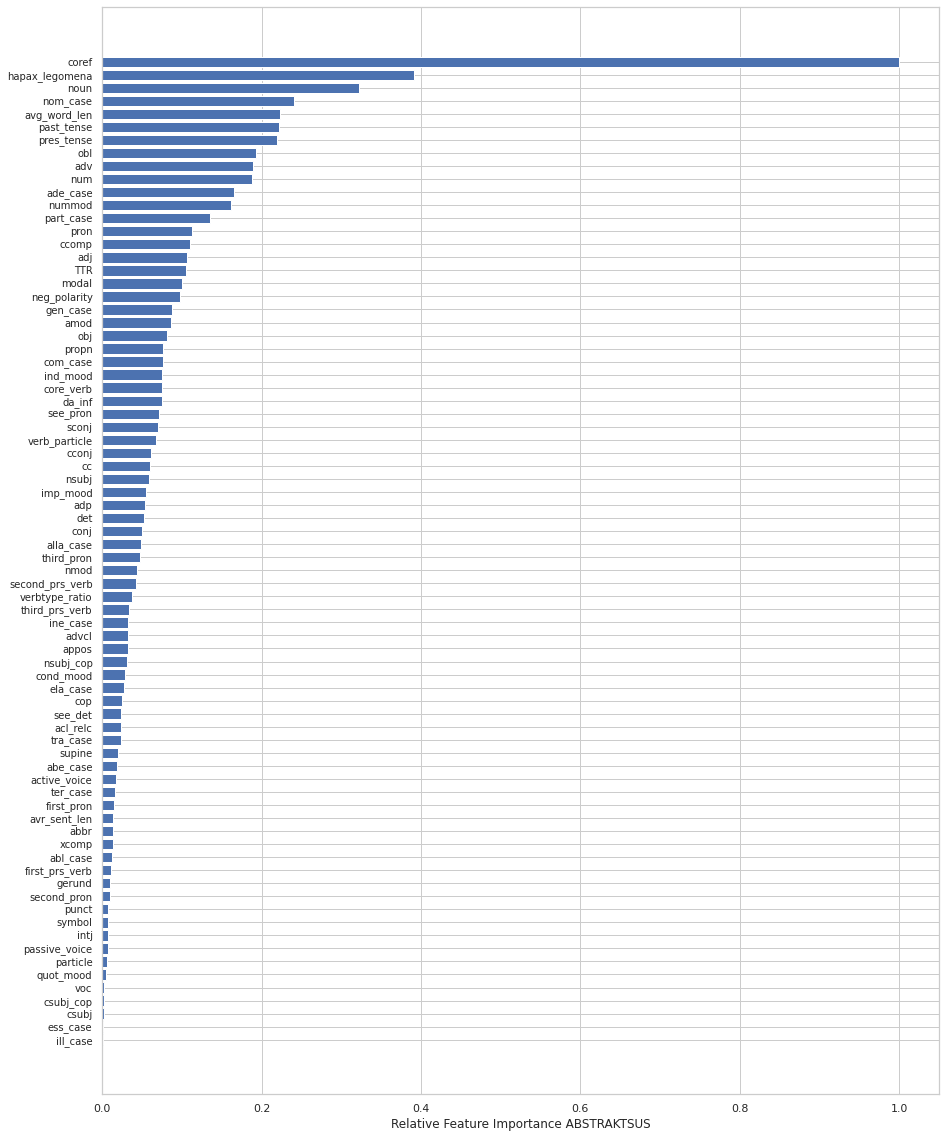

In [302]:
only_abs = initial_df.loc[:, feats + ['abs']].astype('float64')
only_abs['state'] = [1 if score >= 1 else 0 for score in only_abs['abs']]
# print(only_abs)

final_features = only_abs.columns.values.tolist()[:-2]


X = only_abs[final_features]
y = only_abs.state

model = LogisticRegression().fit(X,y)

plot_important_features(model, 'abstraktsus')


In [262]:

log_reg = smf.logit("state ~ coref + hapax_legomena + noun + nom_case + avg_word_len + past_tense + pres_tense + obl + adv + num + ade_case + nummod + part_case", data=only_abs).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.417955
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                           13
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.2684
Time:                        18:03:48   Log-Likelihood:                -50.155
converged:                       True   LL-Null:                       -68.557
Covariance Type:            nonrobust   LLR p-value:                 0.0004446
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.3656      5.132      1.046      0.296      -4.693      15.424
coref              1.2832      1.669      0.769      0.442      -1.987       4.553
hapax_legomena    -0.2999      3.565     -0.084      0.933      -7.287       6.687
noun             -12.0762      8.752     -1.380      0.168     -29.230       5.078
nom_case         -18.9307      9.039     -2.094      0.036     -36.646      -1.215
avg_word_len       0.5199      0.639      0.814      0.416      -0.732       1.772
past_tense       -10.4377     12.252     -0.852      0.394     -34.452      13.576
pres_tense        -0.9511     12.150     -0.078      0.938     -24.766      22.863
obl               -6.0607     13.206     -0.459      0.646     -31.944      19.823
adv               -5.1722     10.103     -0.512      0.609     -24.975      14.630
num               21.6395     22.987      0.941      0.347     -23.414      66.693
ade_case         -32.5422     18.872     -1.724      0.085     -69.531       4.446
nummod           -52.7635     34.954     -1.510      0.131    -121.273      15.746
part_case          2.5500     10.463      0.244      0.807     -17.957      23.057
==================================================================================
"""

## AFEKTIIVNE

In [15]:
tugev = len(initial_df.loc[(initial_df['afek'] < 3) & (initial_df['afek'] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df['afek'] < 2) & (initial_df['afek'] > 1), feature_names])
nork = len(initial_df.loc[initial_df['afek'] < 1, feature_names])

print(tugev, moodukas, nork)

20 22 76


In [ ]:
afek_df, afek_not_df = make_new_df(initial_df, 'afek', 2)

generate_plot('afek', afek_df, feature_names)

In [17]:
afek_corr = afek_df.corr(method='pearson').round(2)
save_csv('afek', 'present', afek_corr)
afek_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.64,-0.01,-0.27,-0.25,-0.20,-0.10,0.30,0.07,0.29,...,0.46,0.56,0.09,0.40,0.65,0.17,0.03,-0.19,-0.16,-0.20
adj,0.64,1.00,0.03,-0.09,0.02,-0.05,-0.25,0.21,-0.07,0.19,...,0.34,0.35,0.18,0.35,0.85,-0.02,0.26,0.09,-0.16,-0.05
propn,-0.01,0.03,1.00,-0.24,0.02,-0.12,-0.20,-0.15,0.00,0.08,...,0.33,0.29,0.61,0.12,0.14,-0.16,0.22,-0.32,-0.02,-0.12
adv,-0.27,-0.09,-0.24,1.00,0.22,0.18,-0.07,-0.04,-0.31,-0.07,...,-0.43,-0.09,-0.09,-0.04,-0.02,-0.19,0.13,0.07,0.10,0.18
intj,-0.25,0.02,0.02,0.22,1.00,0.23,-0.06,0.02,-0.14,-0.17,...,-0.09,-0.10,0.22,-0.15,-0.00,0.02,0.45,-0.09,0.15,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.17,-0.02,-0.16,-0.19,0.02,-0.38,0.65,0.30,0.03,-0.21,...,0.20,0.19,-0.05,-0.18,0.15,1.00,0.30,-0.39,-0.37,-0.38
voc,0.03,0.26,0.22,0.13,0.45,-0.04,0.03,0.34,0.11,-0.01,...,0.14,0.30,0.39,0.13,0.35,0.30,1.00,-0.16,-0.01,-0.04
cop,-0.19,0.09,-0.32,0.07,-0.09,0.14,-0.30,-0.21,0.11,0.20,...,-0.40,-0.34,-0.18,0.13,-0.27,-0.39,-0.16,1.00,0.23,0.14
conj,-0.16,-0.16,-0.02,0.10,0.15,0.73,-0.24,-0.08,0.24,-0.03,...,-0.39,-0.34,0.08,-0.05,-0.24,-0.37,-0.01,0.23,1.00,0.74


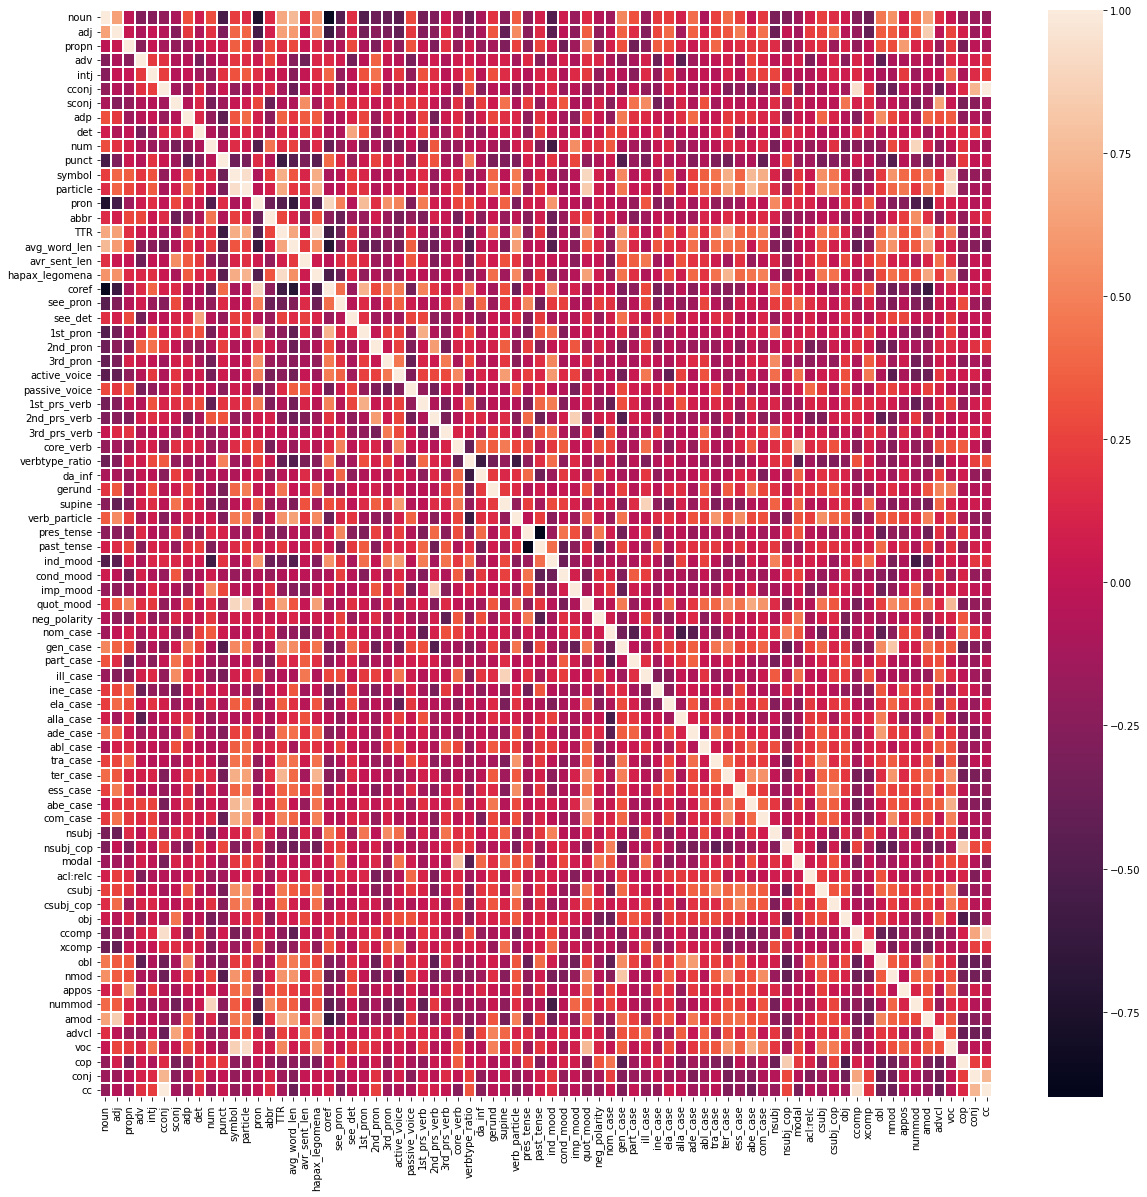

In [18]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(afek_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, 'afek')

[[-3.98242420e-01 -1.52995084e-01 -1.30120473e-01  3.39288926e-01
  -1.01654889e-03 -6.73145148e-03  7.76367321e-02 -4.80530062e-02
   7.17261802e-02 -1.06570310e-01 -1.77811007e-01 -3.07702865e-02
  -1.53713685e-02  2.71642273e-01 -3.44784545e-02  2.20862199e-01
  -1.82515105e+00 -1.53876114e-01  1.08229333e-01  1.44720833e+00
  -3.50882484e-03  1.26600730e-02  7.12314379e-02  2.44508812e-02
   7.82735655e-02  1.62748546e-01 -7.91218170e-02  5.34591147e-02
  -2.79486940e-02 -1.08302427e-02  6.50502415e-02 -2.42185036e-01
  -4.97594119e-02 -4.55076506e-02  2.08041870e-02 -1.98582299e-02
  -5.79120246e-02  1.05607390e-01  9.45976403e-02  6.58777644e-03
  -6.50066901e-02 -1.43016984e-02  1.41580418e-02 -9.58482692e-02
  -3.15107262e-02 -8.54002069e-03  1.06045759e-02 -1.31941539e-01
   9.97633072e-03  1.00336095e-02 -8.44400472e-02 -2.74841006e-02
  -2.28748766e-02 -2.20909155e-02 -3.61612126e-02 -2.10250199e-02
   9.19346116e-03  8.06767347e-02 -4.09992995e-02  2.86673107e-02
  -3.78828

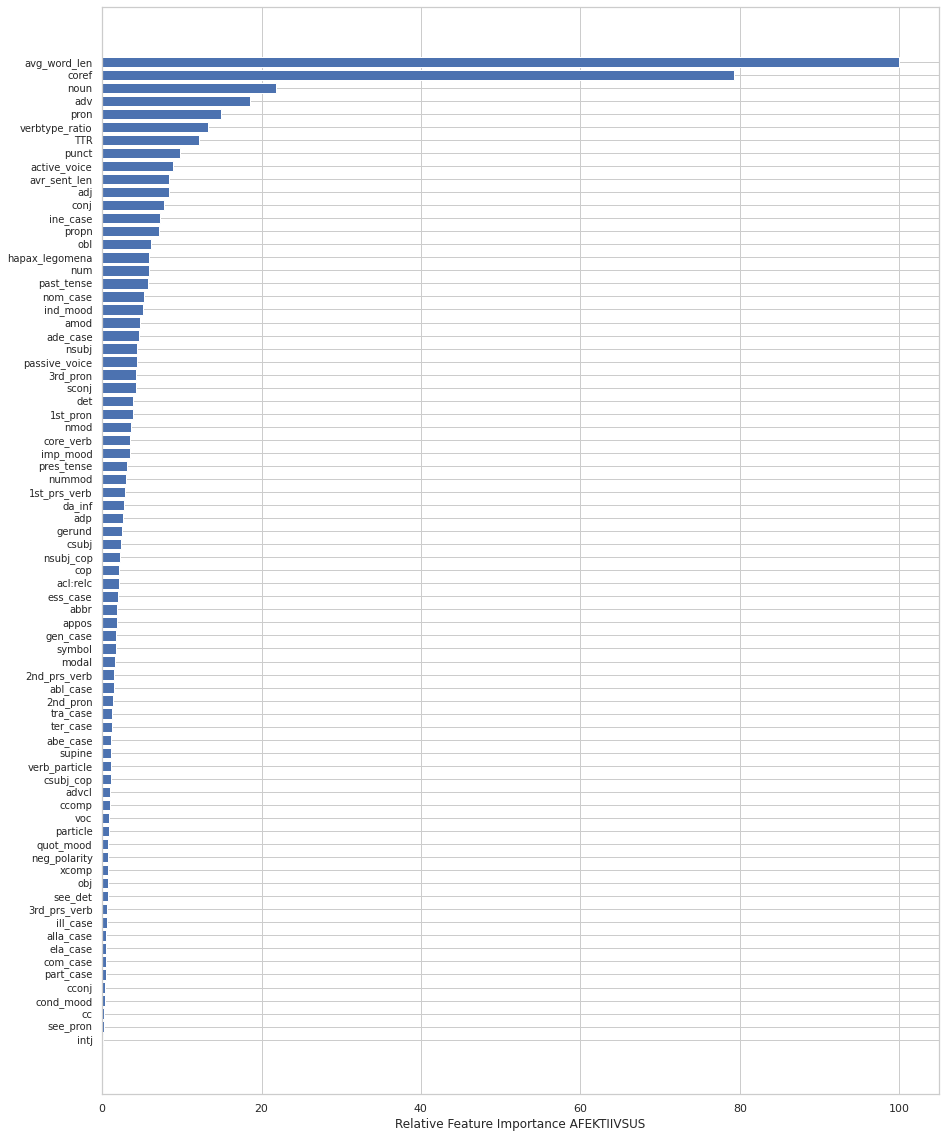

In [198]:
df = initial_df.loc[:, feats + ['afek']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['afek']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'afektiivsus')

In [265]:
log_reg = smf.logit("state ~ avg_word_len + coref + noun + adv + pron + verbtype_ratio + TTR + punct + active_voice + adj + conj + avr_sent_len", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.454017
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                           12
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3137
Time:                        18:05:35   Log-Likelihood:                -54.482
converged:                       True   LL-Null:                       -79.388
Covariance Type:            nonrobust   LLR p-value:                 1.508e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.5964      6.828      2.284      0.022       2.214      28.979
avg_word_len       0.0601      0.515      0.117      0.907      -0.950       1.070
coref            -12.0686     13.597     -0.888      0.375     -38.718      14.581
noun             -14.7460      9.672     -1.525      0.127     -33.703       4.211
adv              -11.1083      9.146     -1.215      0.225     -29.033       6.817
pron               4.7951     52.709      0.091      0.928     -98.513     108.103
verbtype_ratio     0.0393      0.211      0.186      0.852      -0.375       0.453
TTR               -4.1898      5.079     -0.825      0.409     -14.145       5.766
punct            -15.3801     10.409     -1.478      0.140     -35.781       5.021
active_voice     -26.1406      9.232     -2.831      0.005     -44.235      -8.046
adj                2.9243      9.843      0.297      0.766     -16.368      22.216
conj               6.7850      9.218      0.736      0.462     -11.283      24.853
avr_sent_len      -0.0590      0.043     -1.378      0.168      -0.143       0.025
==================================================================================
"""

## AEG

In [19]:
dim = 'aeg'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(tugev, moodukas, nork)



10 31 78


In [20]:
aeg_df, aeg_not_df = make_new_df(initial_df, dim, 2)

aeg_corr = aeg_df.corr(method='pearson').round(2)
save_csv(dim, 'present', aeg_corr)
aeg_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.48,0.02,-0.49,-0.03,-0.16,-0.07,0.27,-0.18,0.14,...,0.33,0.64,0.26,0.33,0.46,0.06,0.32,-0.34,-0.12,-0.16
adj,0.48,1.00,0.15,-0.45,0.28,0.25,-0.13,-0.24,-0.15,0.02,...,0.41,0.30,0.14,0.17,0.76,0.06,0.55,0.11,0.11,0.25
propn,0.02,0.15,1.00,-0.52,0.22,-0.12,-0.27,-0.04,-0.22,0.31,...,0.55,0.48,0.57,0.37,0.30,-0.42,0.39,-0.09,-0.25,-0.13
adv,-0.49,-0.45,-0.52,1.00,-0.20,0.00,0.34,-0.06,0.23,-0.44,...,-0.51,-0.52,-0.56,-0.58,-0.37,0.46,-0.41,-0.03,-0.09,0.00
intj,-0.03,0.28,0.22,-0.20,1.00,0.24,-0.04,-0.17,-0.23,0.11,...,0.18,0.15,0.20,0.24,0.29,-0.01,0.77,0.13,0.12,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.06,0.06,-0.42,0.46,-0.01,-0.05,0.55,0.15,0.19,-0.32,...,-0.07,-0.24,-0.23,-0.26,0.04,1.00,0.06,0.07,-0.12,-0.05
voc,0.32,0.55,0.39,-0.41,0.77,0.16,-0.01,-0.03,-0.18,0.25,...,0.46,0.41,0.35,0.48,0.61,0.06,1.00,0.11,0.06,0.15
cop,-0.34,0.11,-0.09,-0.03,0.13,-0.02,0.15,-0.24,0.26,-0.09,...,-0.07,-0.19,-0.02,-0.10,-0.13,0.07,0.11,1.00,-0.10,-0.02
conj,-0.12,0.11,-0.25,-0.09,0.12,0.83,-0.33,-0.25,-0.25,0.14,...,-0.20,-0.32,-0.16,0.13,0.06,-0.12,0.06,-0.10,1.00,0.84


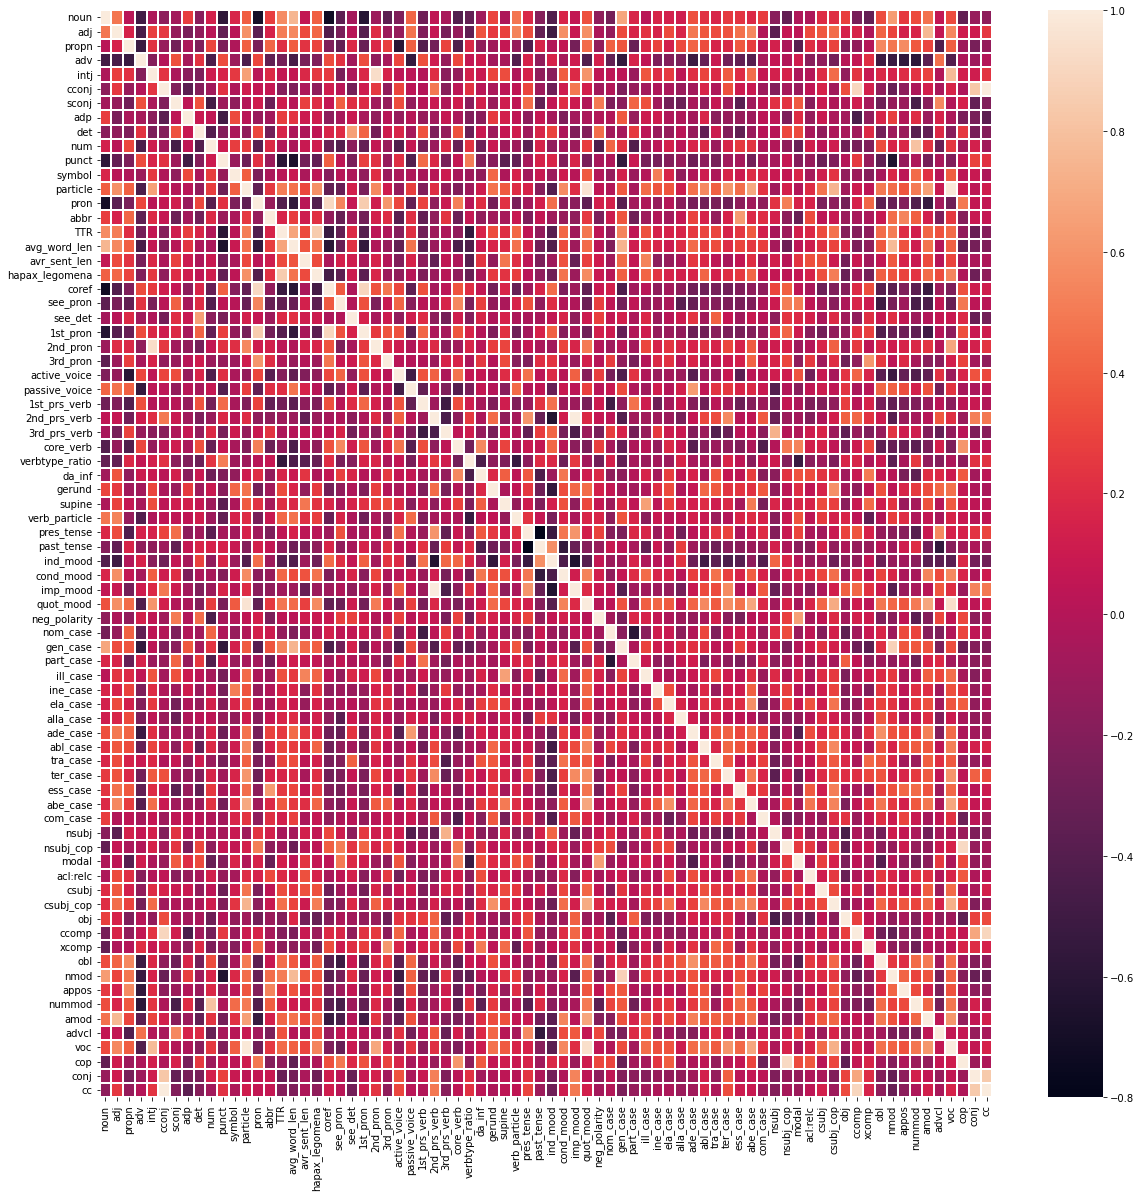

In [21]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(aeg_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('aeg', aeg_df, feature_names)

[[ 2.15163271e-01 -4.66706827e-02  2.01288924e-01 -3.74697295e-01
  -1.78421573e-02 -5.72335770e-02 -2.77860243e-02  7.36429256e-02
  -5.33419634e-02  3.22978947e-01 -1.29291886e-01  4.42945376e-02
  -3.16251956e-03 -9.86705214e-02 -5.34905587e-02  7.19187575e-02
  -3.13131948e-01  8.53177638e-03 -4.08081677e-02 -8.33549678e-01
  -4.56961751e-02 -3.94517132e-02  1.53192469e-02 -4.36260682e-02
   5.16550082e-02  9.80709602e-02  2.01347541e-02  2.01968746e-02
   8.18998430e-02  2.52910278e-03 -2.06381259e-01  4.92562140e-01
  -1.81283736e-01  5.85725450e-03  7.42708496e-03  3.88955108e-02
  -5.60218133e-01  6.67820032e-01 -2.69971515e-02 -1.65998805e-02
   1.09730945e-01 -4.60590262e-03 -8.23059287e-02 -2.33838236e-02
   3.08046156e-01 -1.37068064e-01  4.27761527e-02 -1.94681548e-03
  -6.01970005e-02 -5.24028505e-02  2.05643765e-01  2.99410452e-02
   1.57745583e-02  2.47798265e-02  2.05901584e-02 -1.50879498e-02
   1.79902358e-02  1.14788620e-01 -1.50817606e-01 -6.54574606e-02
  -3.45874

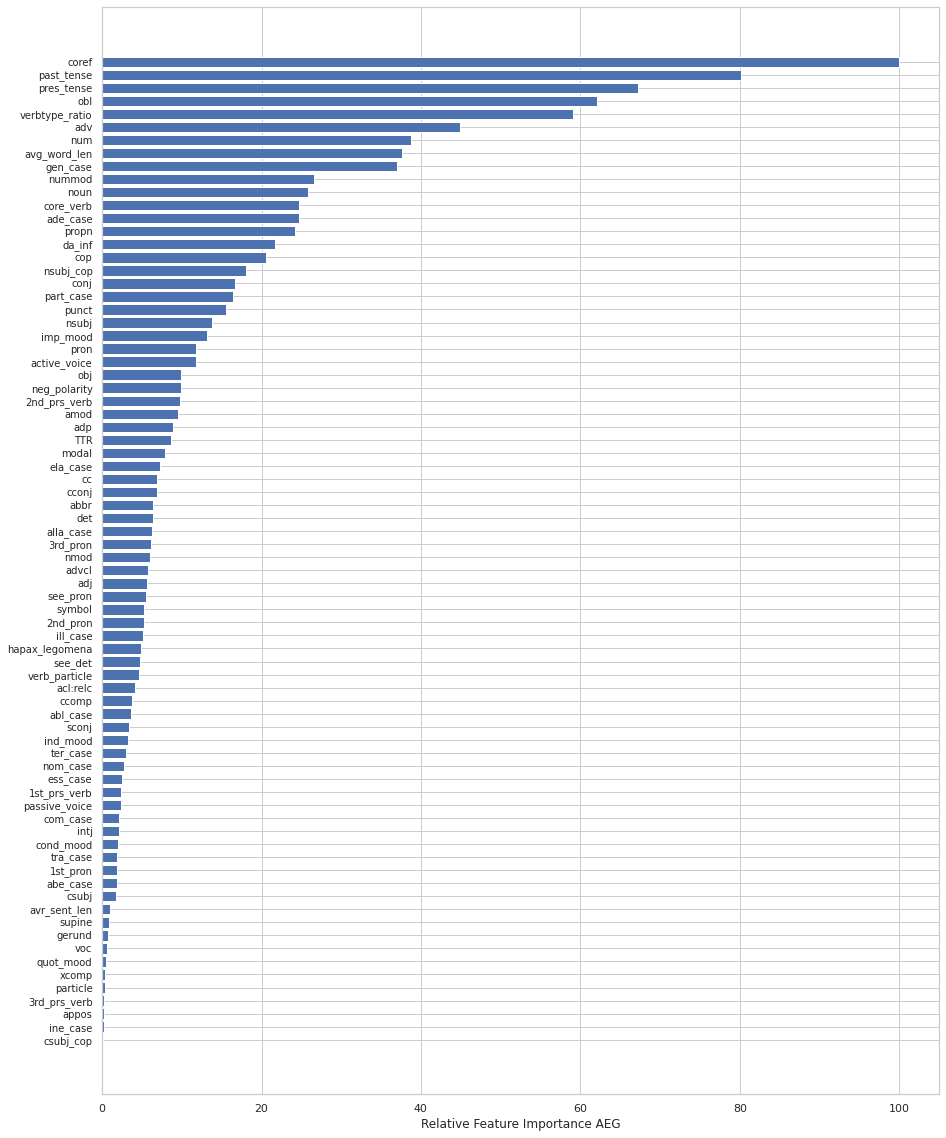

In [197]:
df = initial_df.loc[:, feats + ['aeg']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['aeg']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'aeg')

In [266]:
log_reg = smf.logit("state ~ coref + past_tense + pres_tense + obl + verbtype_ratio + adv + num + avg_word_len + gen_case + nummod + noun + core_verb + ade_case + propn + da_inf + cop", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.416570
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      103
Method:                           MLE   Df Model:                           16
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3703
Time:                        18:06:40   Log-Likelihood:                -49.988
converged:                       True   LL-Null:                       -79.388
Covariance Type:            nonrobust   LLR p-value:                 8.331e-07
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.0394      5.941     -0.343      0.731     -13.684       9.605
coref             -5.3382      3.909     -1.365      0.172     -13.000       2.324
past_tense        -2.1541     13.416     -0.161      0.872     -28.450      24.142
pres_tense        -1.9084     12.235     -0.156      0.876     -25.888      22.072
obl               -0.4136     10.556     -0.039      0.969     -21.103      20.276
verbtype_ratio    -0.1851      0.259     -0.714      0.475      -0.693       0.323
adv                1.9126     10.977      0.174      0.862     -19.602      23.427
num               32.2855     26.564      1.215      0.224     -19.779      84.350
avg_word_len       0.8840      0.731      1.210      0.226      -0.548       2.316
gen_case          -7.1975      7.010     -1.027      0.305     -20.937       6.542
nummod            16.8846     36.808      0.459      0.646     -55.258      89.027
noun              -2.1933     10.371     -0.211      0.833     -22.520      18.133
core_verb        -16.3703     18.251     -0.897      0.370     -52.142      19.401
ade_case         -14.7390     13.046     -1.130      0.259     -40.310      10.832
propn              6.3555      7.422      0.856      0.392      -8.191      20.902
da_inf           -20.8492     25.145     -0.829      0.407     -70.133      28.434
cop                0.7432     25.873      0.029      0.977     -49.967      51.453
==================================================================================
"""

## ARGUMENTATIIVNE

In [23]:
dim = 'arg'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(tugev, moodukas, nork)

9 40 65


In [24]:
arg_df, arg_not_df = make_new_df(initial_df, dim, 2)

arg_corr = arg_df.corr(method='pearson').round(2)
save_csv(dim, 'present', arg_corr)
arg_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.38,0.19,-0.70,0.22,0.02,-0.31,0.41,-0.05,0.26,...,0.35,0.80,0.31,0.34,0.23,-0.12,0.36,-0.35,0.10,0.02
adj,0.38,1.00,0.10,-0.31,0.12,0.20,-0.27,-0.00,-0.10,-0.24,...,0.21,0.10,0.09,-0.14,0.76,0.04,0.20,-0.15,0.17,0.20
propn,0.19,0.10,1.00,-0.34,0.04,-0.26,-0.30,0.20,-0.14,0.28,...,0.42,0.51,0.46,0.33,0.24,-0.42,0.14,-0.52,-0.17,-0.27
adv,-0.70,-0.31,-0.34,1.00,0.02,-0.05,0.18,-0.34,-0.02,-0.28,...,-0.38,-0.59,-0.32,-0.31,-0.20,0.13,-0.15,0.49,-0.17,-0.05
intj,0.22,0.12,0.04,0.02,1.00,0.14,0.05,0.28,-0.05,-0.05,...,-0.03,0.20,0.36,-0.00,0.03,0.20,0.74,0.03,0.12,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,-0.12,0.04,-0.42,0.13,0.20,0.16,0.53,0.11,-0.10,-0.14,...,-0.11,-0.30,-0.18,-0.10,0.14,1.00,0.29,0.15,0.09,0.16
voc,0.36,0.20,0.14,-0.15,0.74,0.13,0.00,0.30,-0.04,-0.01,...,0.05,0.32,0.38,0.08,0.11,0.29,1.00,0.04,0.19,0.13
cop,-0.35,-0.15,-0.52,0.49,0.03,0.33,-0.03,-0.26,0.13,-0.26,...,-0.63,-0.46,-0.18,-0.35,-0.37,0.15,0.04,1.00,0.30,0.33
conj,0.10,0.17,-0.17,-0.17,0.12,0.84,-0.25,-0.05,0.01,-0.26,...,-0.41,-0.09,-0.12,-0.27,-0.04,0.09,0.19,0.30,1.00,0.84


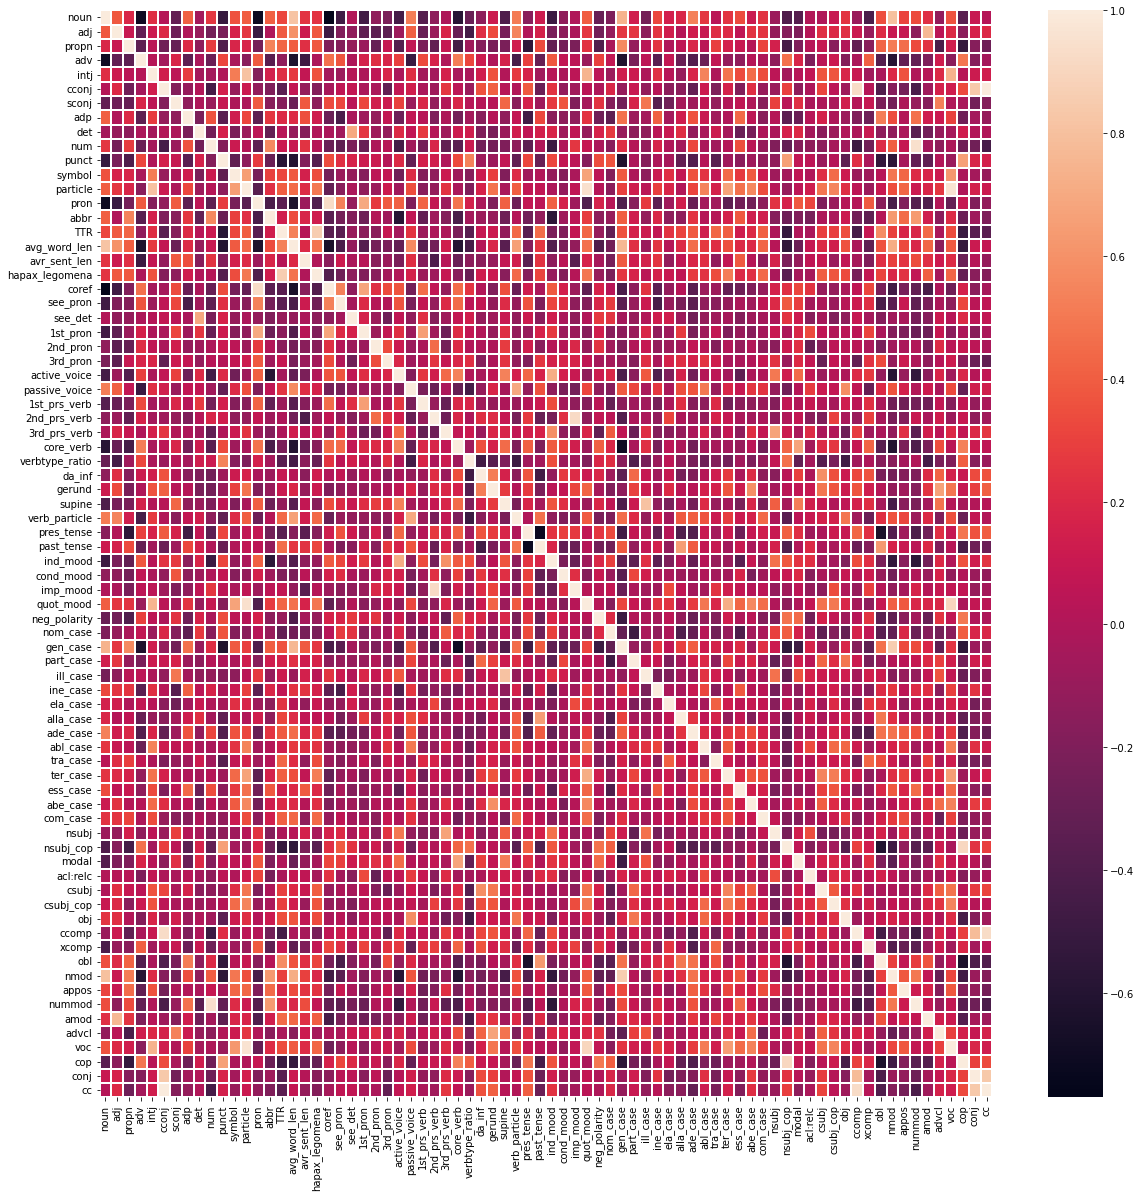

In [25]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(arg_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('arg', arg_df, feature_names)

[[ 0.11881235 -0.20631011 -0.47399263  0.15516901 -0.03105884 -0.06870305
   0.11273181  0.03219182 -0.00959992 -0.14410326  0.01333662 -0.0459547
  -0.02690031 -0.0868977  -0.081811   -0.20755955 -0.26499955 -0.03718704
  -0.4956824  -0.85582359  0.08939195  0.01759278 -0.06715198 -0.01713543
  -0.08398132  0.01915825 -0.09183307 -0.09707326 -0.07528967 -0.09558349
   0.13153144 -0.46911753  0.06770282 -0.0191397  -0.01847044 -0.08730661
   0.28387589 -0.36513763 -0.0053993   0.04206899 -0.08185556 -0.02886952
   0.1932085  -0.0608709  -0.25153883  0.16794677 -0.00450465 -0.09660831
  -0.08507406 -0.10107878 -0.08936988 -0.05675715 -0.15196741 -0.02006702
  -0.0039427  -0.01339454 -0.03720706 -0.06217685  0.03901318  0.12112123
  -0.10778349  0.0306508  -0.02899643 -0.06681092 -0.05606826 -0.0646161
  -0.19312941 -0.06522799 -0.06531994 -0.08834361 -0.1445661   0.13986675
  -0.02547781  0.07018977 -0.21235998 -0.06689921]]


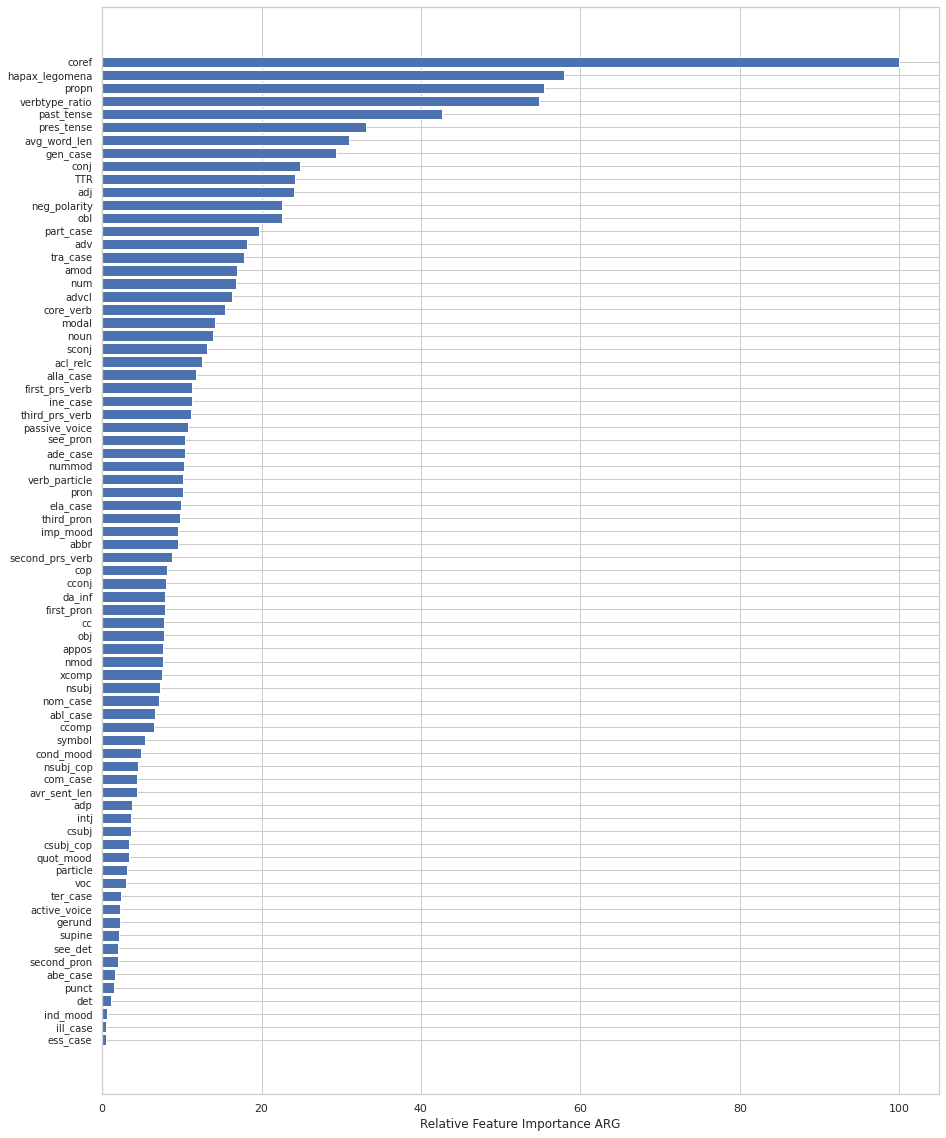

In [267]:
df = initial_df.loc[:, feats + ['arg']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['arg']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'arg')



In [268]:
log_reg = smf.logit("state ~ coref + hapax_legomena + propn + verbtype_ratio + past_tense + pres_tense + avg_word_len + gen_case + conj + TTR + adj + neg_polarity + obl + part_case", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.341729
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                           14
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3462
Time:                        18:07:29   Log-Likelihood:                -41.007
converged:                       True   LL-Null:                       -62.719
Covariance Type:            nonrobust   LLR p-value:                 7.331e-05
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.9593      7.167      1.529      0.126      -3.088      25.007
coref             -6.3054      2.892     -2.181      0.029     -11.973      -0.638
hapax_legomena     0.4690      6.675      0.070      0.944     -12.614      13.552
propn            -17.8662      9.012     -1.982      0.047     -35.530      -0.202
verbtype_ratio    -0.6148      0.400     -1.537      0.124      -1.399       0.169
past_tense       -21.5747     14.853     -1.453      0.146     -50.686       7.536
pres_tense       -17.7937     16.594     -1.072      0.284     -50.318      14.731
avg_word_len       0.7669      0.978      0.784      0.433      -1.151       2.684
gen_case          -5.8176      8.002     -0.727      0.467     -21.500       9.865
conj             -31.2805     14.144     -2.212      0.027     -59.002      -3.559
TTR               -9.6877     12.427     -0.780      0.436     -34.044      14.669
adj              -24.1602     13.536     -1.785      0.074     -50.690       2.370
neg_polarity      49.4770     21.918      2.257      0.024       6.519      92.435
obl               -5.3808     12.628     -0.426      0.670     -30.130      19.369
part_case         11.5528     13.729      0.841      0.400     -15.356      38.461
==================================================================================
"""

## FORMAALNE

In [27]:
dim = 'form'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

form
9 25 81


In [28]:
form_df, form_not_df = make_new_df(initial_df, dim, 2)

form_corr = form_df.corr(method='pearson').round(2)
save_csv(dim, 'present', form_corr)
form_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.06,-0.45,-0.42,0.13,0.22,0.20,-0.00,-0.10,-0.19,...,-0.19,0.63,-0.05,-0.08,-0.07,0.10,0.13,-0.21,0.11,0.22
adj,0.06,1.00,-0.26,-0.07,0.26,0.09,0.11,-0.41,0.03,-0.12,...,0.22,-0.28,-0.31,-0.08,0.69,0.17,0.26,0.09,0.17,0.09
propn,-0.45,-0.26,1.00,-0.02,-0.03,-0.03,-0.44,-0.27,-0.22,0.05,...,0.25,0.20,0.42,0.06,0.15,-0.41,-0.03,-0.23,-0.18,-0.03
adv,-0.42,-0.07,-0.02,1.00,-0.04,-0.19,0.11,0.03,-0.07,-0.20,...,-0.14,-0.26,-0.04,-0.26,-0.23,0.07,-0.04,-0.02,-0.06,-0.19
intj,0.13,0.26,-0.03,-0.04,1.00,0.23,0.24,-0.15,0.10,0.03,...,0.24,0.07,0.21,-0.00,0.35,0.19,1.00,0.06,0.10,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.10,0.17,-0.41,0.07,0.19,-0.17,0.60,0.34,0.29,-0.04,...,-0.08,-0.15,-0.06,-0.02,0.19,1.00,0.19,-0.04,-0.16,-0.17
voc,0.13,0.26,-0.03,-0.04,1.00,0.23,0.24,-0.15,0.10,0.03,...,0.24,0.07,0.21,-0.00,0.35,0.19,1.00,0.06,0.10,0.23
cop,-0.21,0.09,-0.23,-0.02,0.06,-0.05,0.02,0.02,0.29,0.10,...,-0.07,-0.30,-0.08,0.08,-0.03,-0.04,0.06,1.00,0.10,-0.05
conj,0.11,0.17,-0.18,-0.06,0.10,0.77,-0.32,-0.35,-0.25,-0.19,...,-0.48,-0.04,-0.22,-0.20,0.03,-0.16,0.10,0.10,1.00,0.77


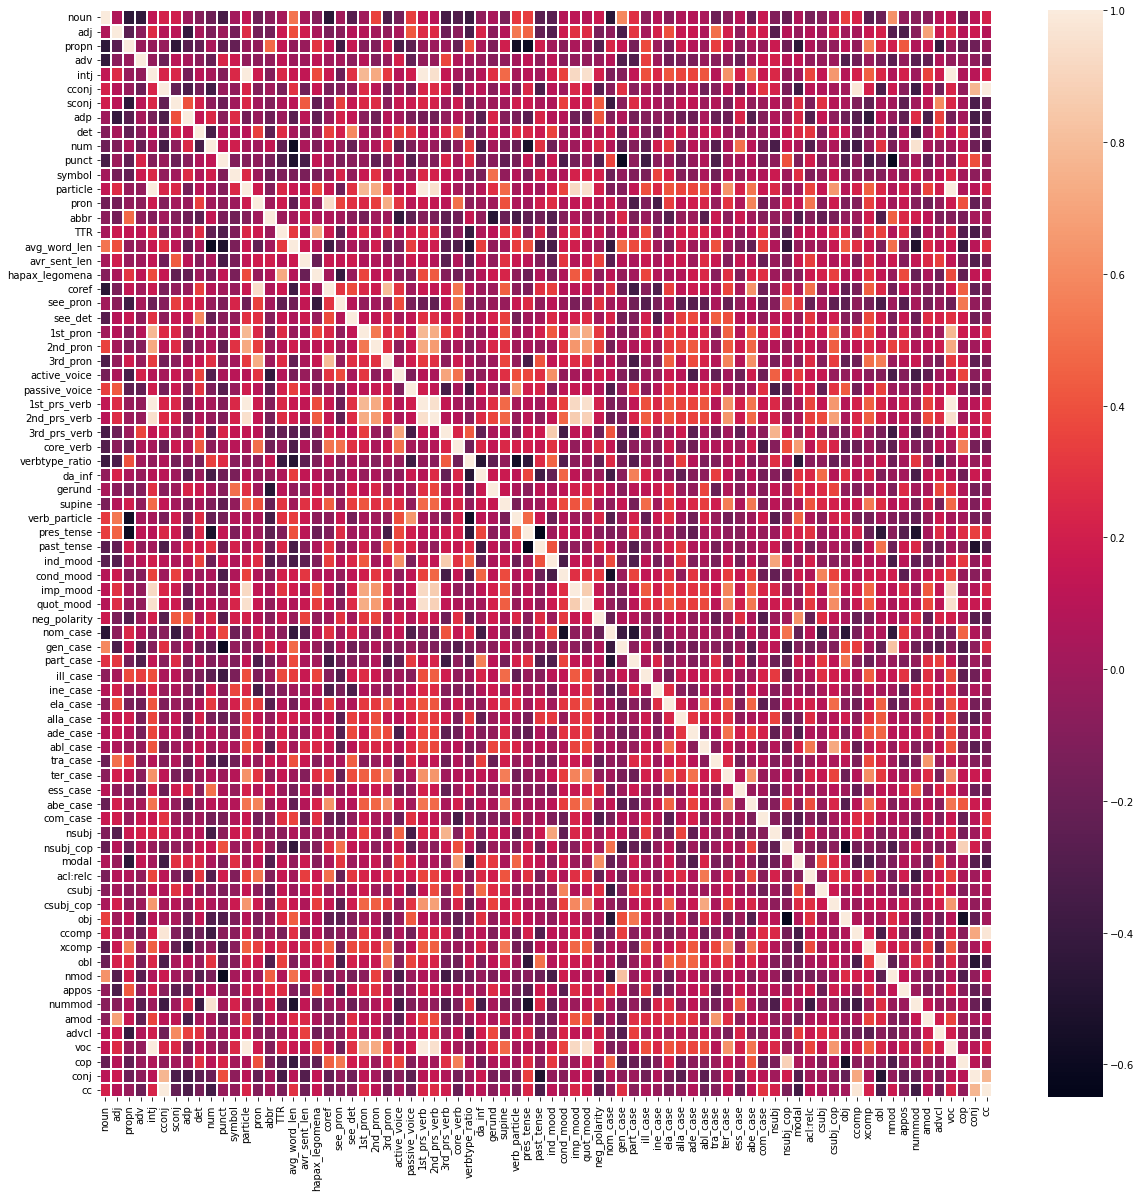

In [29]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(form_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('form', form_df, feature_names)

[[ 0.43186105  0.19099871  0.13669277 -0.34462029  0.00482158 -0.03920953
  -0.07443427  0.07598896 -0.07334692  0.25922574 -0.12296341  0.01710714
   0.00704742 -0.11568516  0.12401907 -0.02610463  1.69366805 -0.00842167
  -0.202251   -0.62579274 -0.06549195 -0.02509263 -0.03617281  0.00451463
   0.0854567  -0.15866842  0.151589   -0.06632033 -0.03458513 -0.05109047
  -0.18882563 -0.16267292 -0.01312328 -0.02970125  0.00379753  0.11661888
  -0.18664656  0.18248492 -0.05793309 -0.01997789 -0.02306698  0.00230397
  -0.02700273 -0.12663644  0.46535177 -0.11639157 -0.03892299  0.01174932
   0.13446432  0.14025498  0.1641758   0.00594954  0.010061    0.02462724
   0.00540762  0.02343206 -0.05308881 -0.10147293 -0.05657004 -0.04632019
  -0.02896766 -0.00904109 -0.00814802  0.09326839 -0.05732484 -0.00294358
   0.35111912  0.27124151  0.01184722  0.21811874  0.0760422  -0.12096925
   0.00692928 -0.08314551  0.03166232 -0.03937492]]


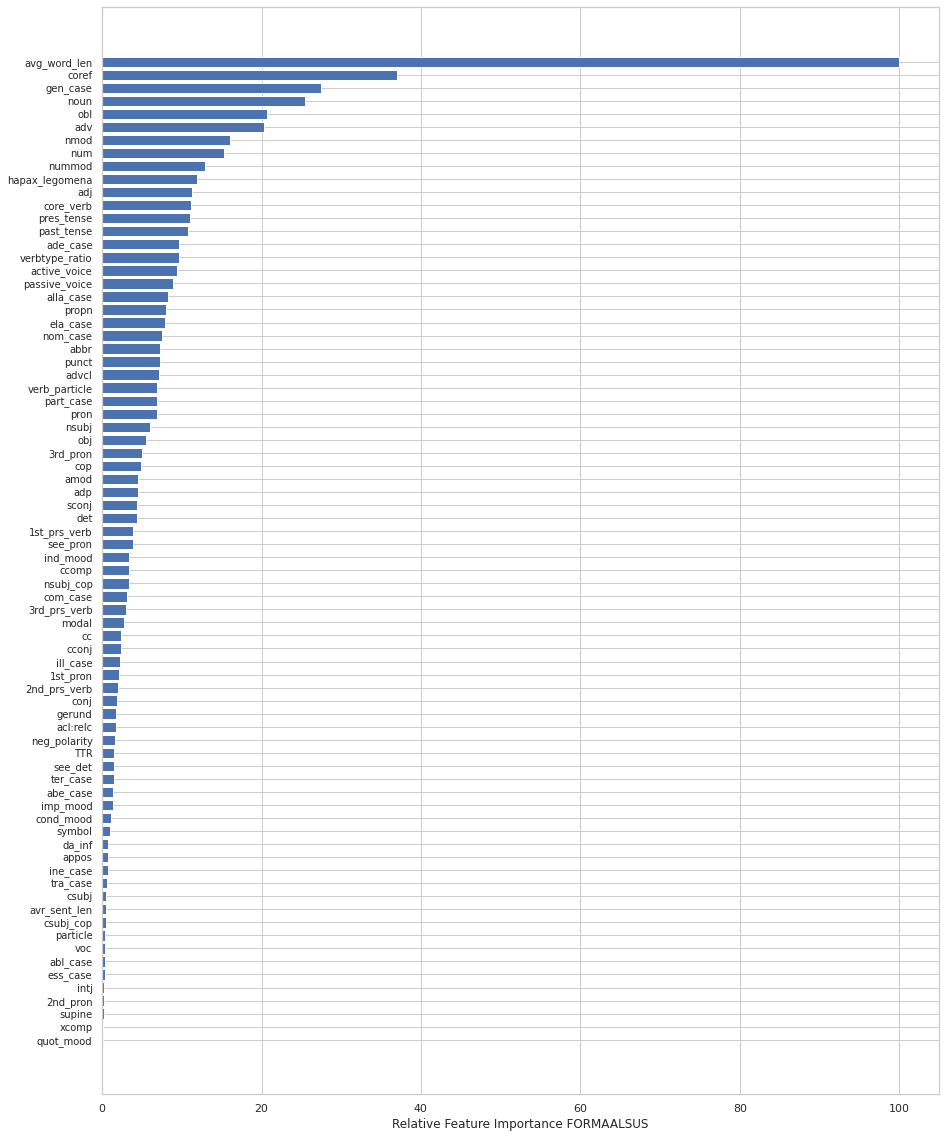

In [205]:
df = initial_df.loc[:, feats + ['form']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['form']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'formaalsus')




In [269]:

log_reg = smf.logit("state ~ avg_word_len + coref + gen_case + noun + obl + adv + nmod + num", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.464105
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            8
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.1120
Time:                        18:09:35   Log-Likelihood:                -55.693
converged:                       True   LL-Null:                       -62.719
Covariance Type:            nonrobust   LLR p-value:                   0.08041
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9506      4.193      0.227      0.821      -7.268       9.170
avg_word_len    -0.2602      0.573     -0.454      0.650      -1.384       0.863
coref           -2.7421      2.232     -1.228      0.219      -7.118       1.633
gen_case        -9.9622      7.901     -1.261      0.207     -25.448       5.523
noun             4.3842      7.684      0.571      0.568     -10.675      19.444
obl             -9.4791      8.943     -1.060      0.289     -27.007       8.049
adv              7.2183      8.336      0.866      0.387      -9.119      23.556
nmod             7.0990     10.882      0.652      0.514     -14.228      28.426
num            -17.6802     11.847     -1.492      0.136     -40.900       5.540
================================================================================
"""

## IMPERSONAALNE

In [31]:
dim = 'imp'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

imp
19 42 54


In [32]:
imp_df, imp_not_df = make_new_df(initial_df, dim, 2)

imp_corr = imp_df.corr(method='pearson').round(2)
save_csv(dim, 'present', imp_corr)
imp_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.12,-0.23,-0.57,0.15,0.06,-0.11,0.12,-0.04,-0.02,...,0.04,0.55,0.09,0.05,-0.03,-0.18,0.15,-0.23,0.18,0.06
adj,0.12,1.00,-0.15,-0.14,0.28,0.06,0.05,-0.30,-0.13,-0.09,...,0.17,-0.15,-0.17,-0.02,0.73,0.14,0.28,-0.01,0.17,0.06
propn,-0.23,-0.15,1.00,-0.23,0.06,-0.12,-0.37,-0.14,-0.17,0.17,...,0.32,0.43,0.48,0.17,0.18,-0.48,0.06,-0.33,-0.22,-0.12
adv,-0.57,-0.14,-0.23,1.00,-0.15,-0.07,0.26,-0.10,-0.05,-0.20,...,-0.37,-0.38,-0.22,-0.21,-0.18,0.36,-0.15,0.26,-0.23,-0.07
intj,0.15,0.28,0.06,-0.15,1.00,0.22,0.17,-0.09,0.03,0.08,...,0.31,0.06,0.21,0.08,0.34,0.18,1.00,0.10,0.02,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,-0.18,0.14,-0.48,0.36,0.18,0.16,0.69,0.05,0.03,-0.24,...,-0.17,-0.41,-0.23,-0.22,0.10,1.00,0.18,0.18,-0.05,0.16
voc,0.15,0.28,0.06,-0.15,1.00,0.22,0.17,-0.09,0.03,0.08,...,0.31,0.06,0.21,0.08,0.34,0.18,1.00,0.10,0.02,0.22
cop,-0.23,-0.01,-0.33,0.26,0.10,0.05,0.09,-0.13,0.35,-0.15,...,-0.37,-0.31,-0.20,-0.15,-0.14,0.18,0.10,1.00,0.12,0.05
conj,0.18,0.17,-0.22,-0.23,0.02,0.56,-0.32,-0.14,-0.18,-0.13,...,-0.32,-0.18,-0.22,-0.15,0.00,-0.05,0.02,0.12,1.00,0.56


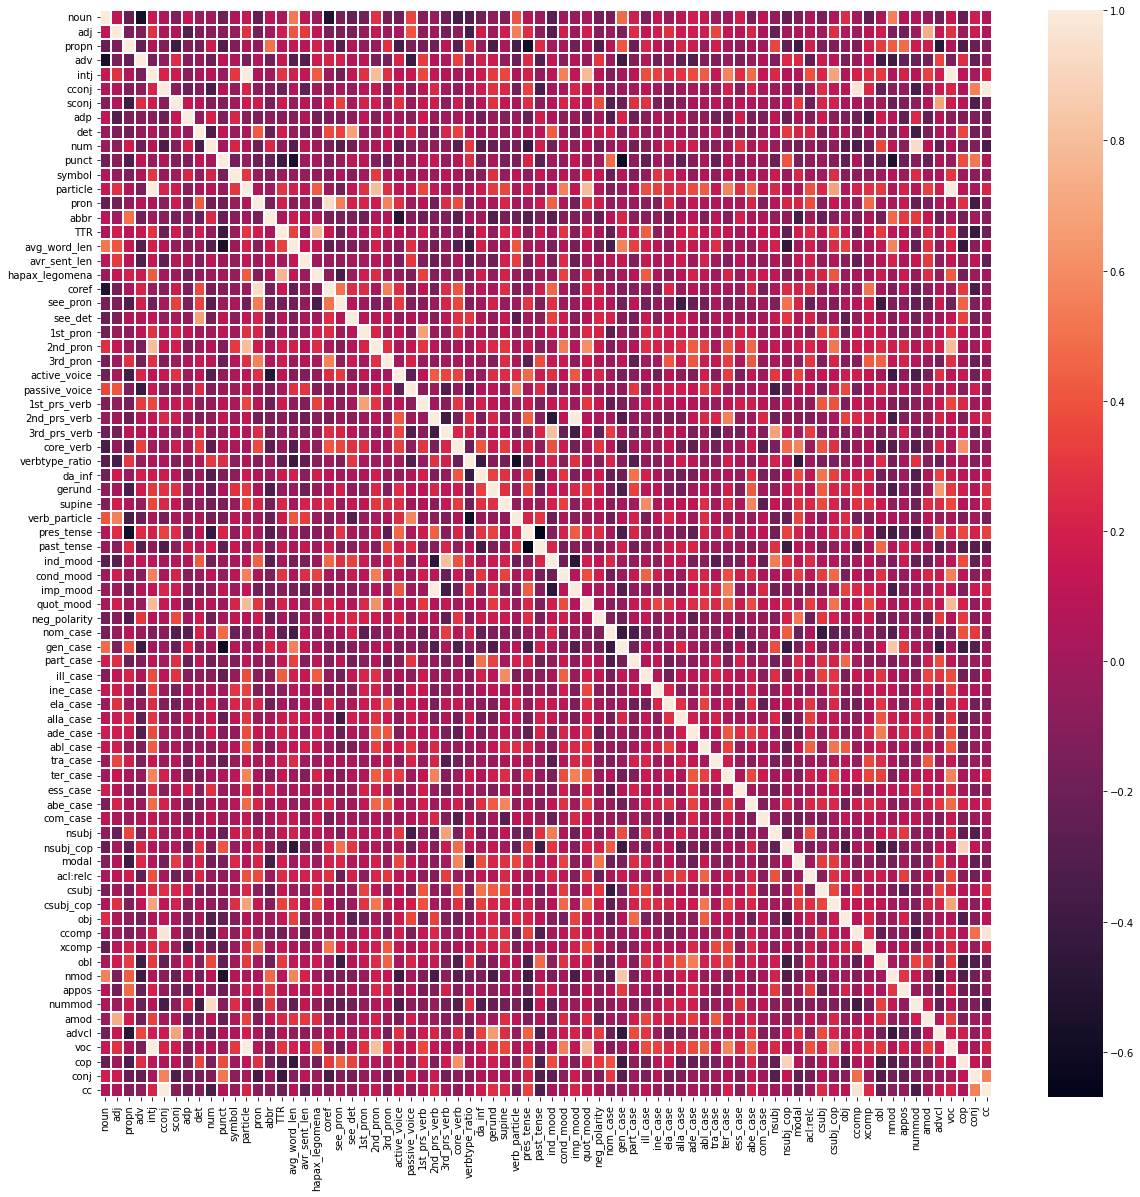

In [33]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(imp_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('imp', imp_df, feature_names)

[[ 0.5862884   0.30381872 -0.24477446 -0.30449617  0.01188011  0.04409069
  -0.06411203  0.09139679 -0.04251247  0.3699701   0.11808687  0.06424148
   0.0191986  -0.37139647  0.25425878 -0.21898422  0.96428433  0.02764249
  -0.32222286 -1.76162208 -0.00242366 -0.00816049 -0.06699108 -0.00617491
  -0.07421644 -0.21297042  0.07395585 -0.13437002  0.03829338  0.01983877
  -0.13647421 -0.01449294  0.06118527  0.03787865 -0.02907306  0.05907452
   0.42690806 -0.51768375 -0.17012102 -0.00995868  0.05502739  0.0281545
  -0.02556637 -0.02176754 -0.06718373  0.0345614  -0.02381004  0.17793071
   0.10228754  0.00718911 -0.0949364  -0.00197495  0.06792559  0.01367877
   0.01566607  0.05880499 -0.01189954 -0.18141189  0.13342408 -0.04384108
  -0.05821489  0.03612312 -0.00574814 -0.19209485 -0.04672052 -0.08090789
  -0.09322606  0.15058788 -0.1163907   0.30197538  0.10652819  0.05941729
   0.01866962  0.10120947  0.41465156  0.04341685]]


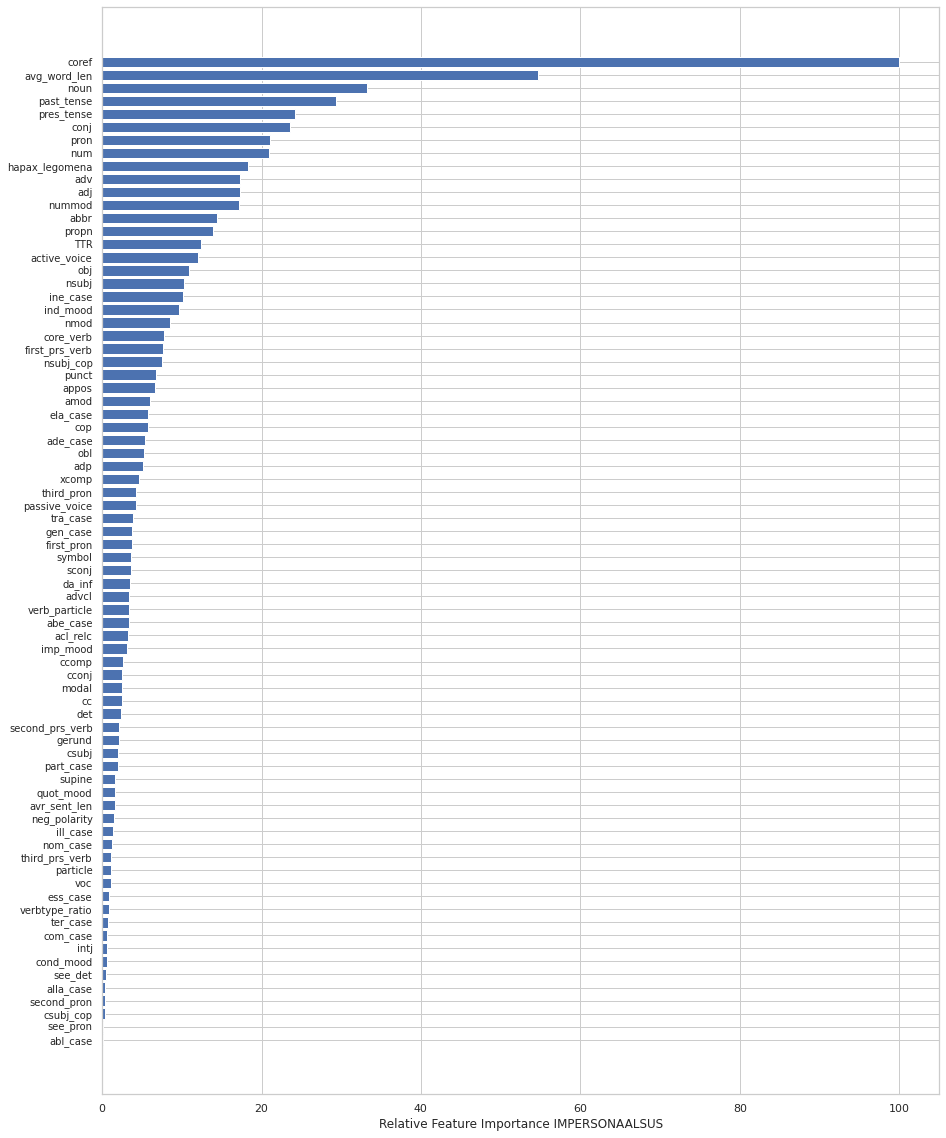

In [270]:
df = initial_df.loc[:, feats + ['imp']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['imp']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'impersonaalsus')





In [271]:
log_reg = smf.logit("state ~ avg_word_len + coref + noun + past_tense + pres_tense + conj + pron + num", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.372762
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            8
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.4195
Time:                        18:10:14   Log-Likelihood:                -44.731
converged:                       True   LL-Null:                       -77.056
Covariance Type:            nonrobust   LLR p-value:                 5.661e-11
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -11.1517      4.379     -2.547      0.011     -19.734      -2.569
avg_word_len     1.1461      0.510      2.248      0.025       0.147       2.145
coref           -3.1303     13.874     -0.226      0.821     -30.323      24.063
noun             6.3223      9.009      0.702      0.483     -11.334      23.979
past_tense      -8.2675     10.612     -0.779      0.436     -29.067      12.532
pres_tense      15.5068     10.704      1.449      0.147      -5.472      36.485
conj            14.5321      9.203      1.579      0.114      -3.506      32.570
pron            -8.5264     51.985     -0.164      0.870    -110.415      93.362
num             27.8289     10.661      2.610      0.009       6.933      48.725
================================================================================
"""

## INFO

In [35]:
dim = 'info'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])
print(dim)
print(tugev, moodukas, nork)

info
23 48 44


In [36]:
info_df, info_not_df = make_new_df(initial_df, dim, 2)

info_corr = info_df.corr(method='pearson').round(2)
save_csv(dim, 'present', info_corr)
info_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.17,-0.13,-0.58,0.22,0.17,-0.11,0.21,-0.09,0.00,...,0.08,0.65,0.07,0.14,0.08,-0.12,0.34,-0.31,0.27,0.17
adj,0.17,1.00,-0.15,-0.18,0.28,0.08,0.01,-0.24,-0.10,-0.14,...,0.11,-0.08,-0.10,-0.03,0.72,0.07,0.24,-0.02,0.19,0.08
propn,-0.13,-0.15,1.00,-0.29,0.14,-0.01,-0.48,-0.05,-0.20,0.24,...,0.40,0.38,0.58,0.24,0.12,-0.51,0.24,-0.25,-0.10,-0.01
adv,-0.58,-0.18,-0.29,1.00,-0.15,-0.10,0.29,-0.18,0.04,-0.25,...,-0.39,-0.45,-0.28,-0.28,-0.25,0.33,-0.26,0.28,-0.27,-0.10
intj,0.22,0.28,0.14,-0.15,1.00,0.32,0.04,0.06,-0.10,0.02,...,0.19,0.13,0.33,0.08,0.19,0.07,0.82,0.07,0.19,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,-0.12,0.07,-0.51,0.33,0.07,0.05,0.69,0.11,0.16,-0.29,...,-0.20,-0.39,-0.22,-0.21,0.06,1.00,0.07,0.18,-0.12,0.05
voc,0.34,0.24,0.24,-0.26,0.82,0.31,-0.01,0.13,-0.11,0.10,...,0.29,0.25,0.40,0.17,0.20,0.07,1.00,-0.01,0.20,0.31
cop,-0.31,-0.02,-0.25,0.28,0.07,-0.05,0.15,-0.14,0.23,-0.16,...,-0.36,-0.34,-0.09,-0.19,-0.23,0.18,-0.01,1.00,0.06,-0.05
conj,0.27,0.19,-0.10,-0.27,0.19,0.59,-0.34,-0.14,-0.23,-0.07,...,-0.27,-0.04,-0.12,-0.08,0.03,-0.12,0.20,0.06,1.00,0.59


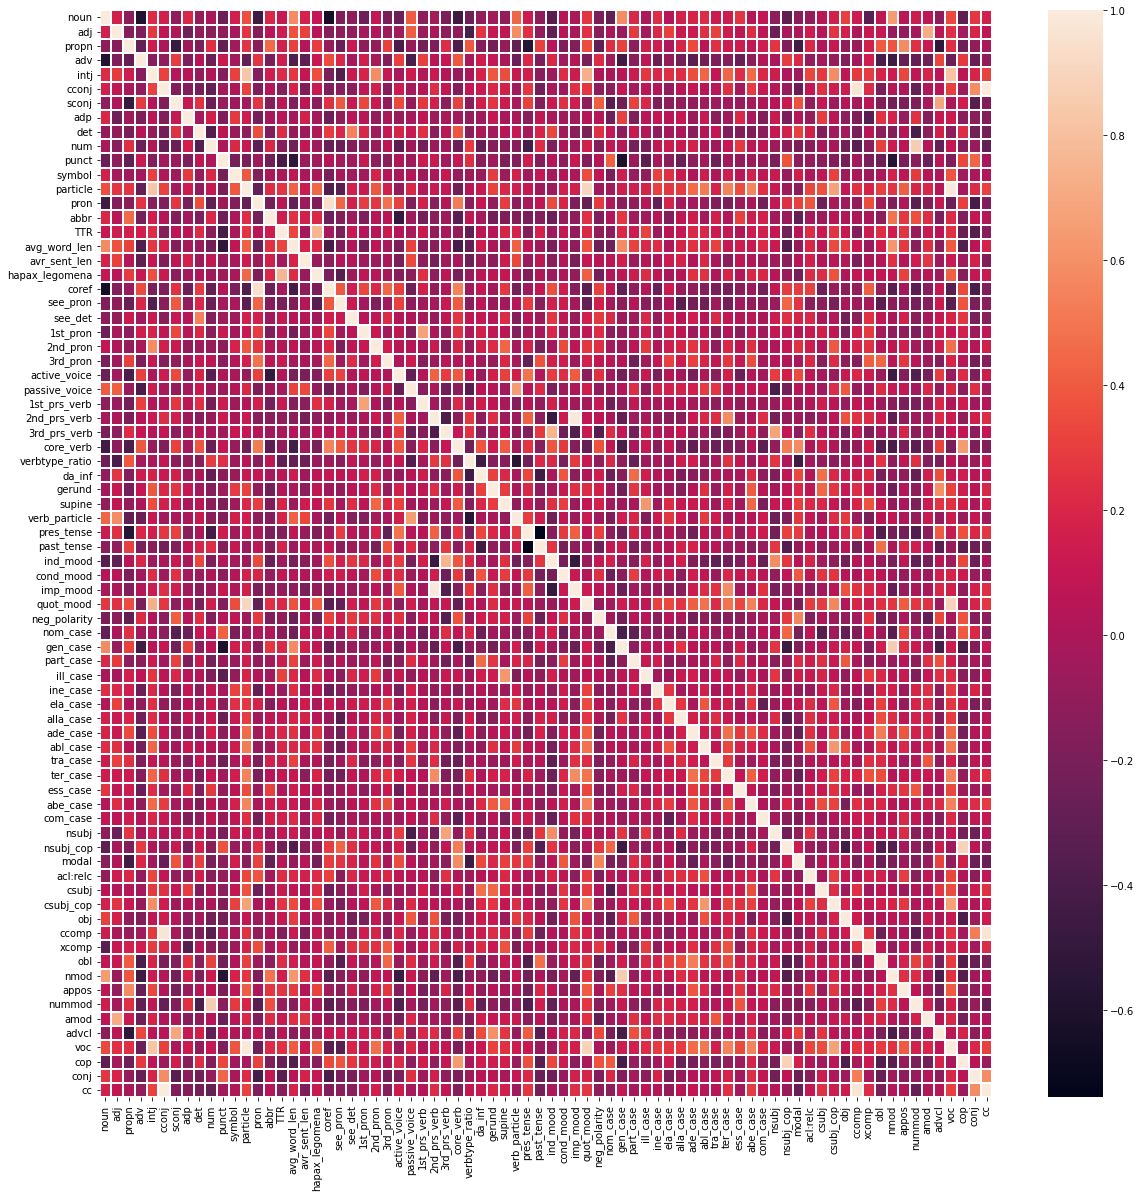

In [37]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(info_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('info', info_df, feature_names)

[[ 0.20323179  0.09417859  0.47232728 -0.23552883 -0.02132106 -0.052157
  -0.18679214  0.14054466 -0.23809127  0.67460324 -0.01660346  0.05482309
  -0.01155722 -0.39910744  0.26810396 -0.21391437  0.59102477 -0.00761032
  -0.35095604 -1.8061386  -0.03755075 -0.08239339 -0.12404498 -0.04122802
  -0.03149145 -0.48486334  0.15259154 -0.2404666   0.05620758 -0.0139235
  -0.25433743  0.20356155 -0.09891074 -0.0040017  -0.11644852  0.1170622
  -0.27308738  0.04574138 -0.36577611 -0.09528516  0.08206271 -0.00418256
  -0.17486626  0.26388221  0.04662751 -0.2213144  -0.12017716  0.04002026
   0.03696164 -0.06596042  0.02122395 -0.00880778  0.00622595 -0.00929559
   0.04518093  0.01046574  0.0044814  -0.3214972  -0.00264018 -0.13386148
  -0.05502967  0.00314135 -0.01863507 -0.15701609 -0.13947088 -0.10492979
   0.1381255   0.1177125  -0.01810613  0.46130061 -0.01032442 -0.07832097
  -0.01249539 -0.06368085  0.30234476 -0.0529253 ]]


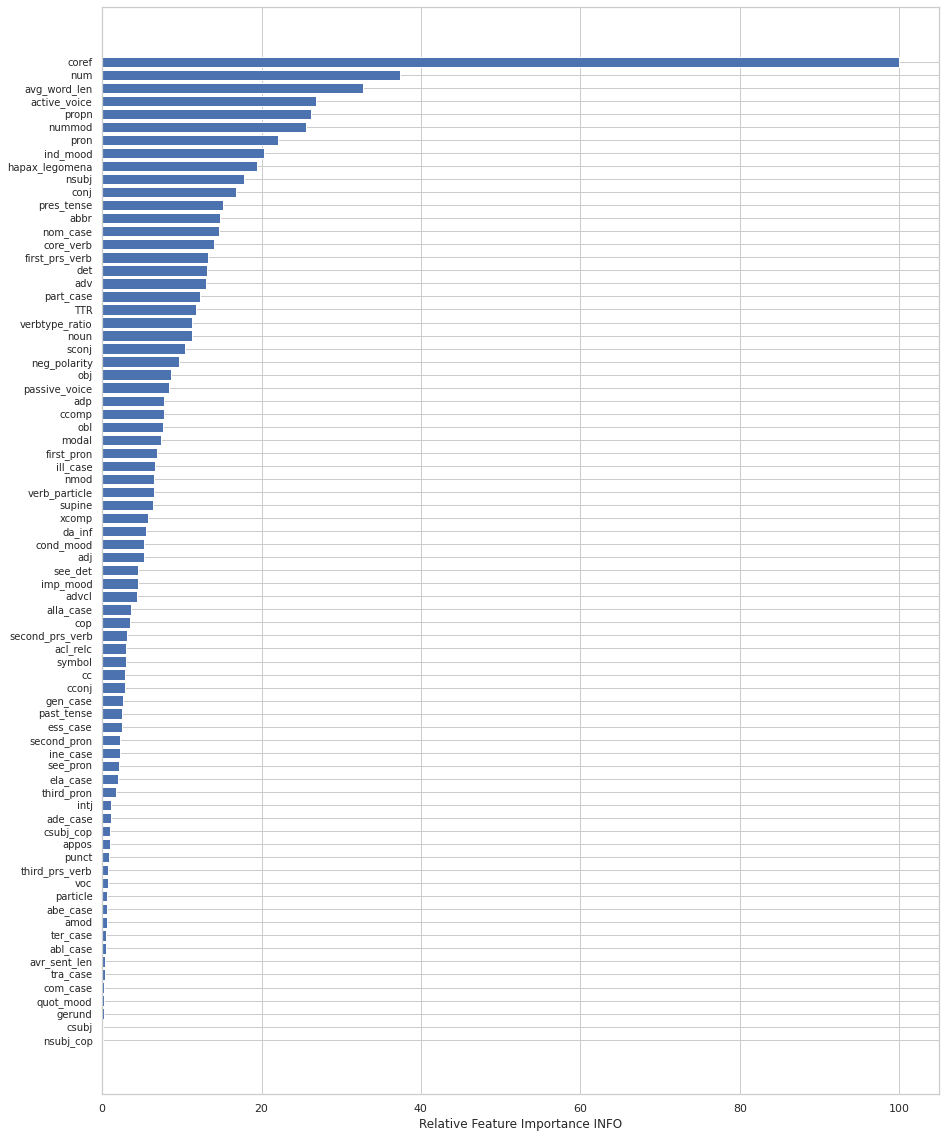

In [272]:
df = initial_df.loc[:, feats + ['info']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['info']]

final_features = df.columns.values.tolist()[:-2]

X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'info')


In [273]:

log_reg = smf.logit("state ~ coref + num + avg_word_len + active_voice + propn + nummod + pron + ind_mood + hapax_legomena + nsubj", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.388134
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                           10
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.4133
Time:                        18:13:20   Log-Likelihood:                -46.576
converged:                       True   LL-Null:                       -79.388
Covariance Type:            nonrobust   LLR p-value:                 3.080e-10
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7374      3.864      0.450      0.653      -5.836       9.311
coref             -0.7495      6.876     -0.109      0.913     -14.226      12.727
num               28.3944     25.710      1.104      0.269     -21.997      78.786
avg_word_len       0.5967      0.503      1.186      0.236      -0.390       1.583
active_voice      -7.7577     10.697     -0.725      0.468     -28.723      13.208
propn              8.2852      5.497      1.507      0.132      -2.489      19.060
nummod            12.8710     35.526      0.362      0.717     -56.759      82.501
pron             -20.6377     32.078     -0.643      0.520     -83.510      42.234
ind_mood          -8.1024     13.515     -0.600      0.549     -34.592      18.387
hapax_legomena    -5.5466      3.088     -1.796      0.072     -11.600       0.506
nsubj            -26.5736     16.302     -1.630      0.103     -58.526       5.379
==================================================================================
"""

## INSTRUEERIV

In [39]:
dim = 'inst'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

inst
11 17 86


In [40]:
inst_df, inst_not_df = make_new_df(initial_df, dim, 2)

inst_corr = inst_df.corr(method='pearson').round(2)
save_csv(dim, 'present', inst_corr)
inst_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.24,0.13,-0.65,-0.06,0.06,-0.48,0.27,-0.20,0.24,...,0.22,0.71,0.34,0.38,0.28,-0.32,0.16,-0.38,0.30,0.06
adj,0.24,1.00,0.08,-0.40,0.31,0.19,-0.29,-0.13,-0.18,0.16,...,0.22,0.12,0.12,0.17,0.80,-0.11,0.24,-0.01,0.13,0.19
propn,0.13,0.08,1.00,-0.42,-0.01,-0.02,-0.50,0.25,-0.29,0.11,...,0.22,0.56,0.34,0.11,0.27,-0.50,0.19,-0.24,0.06,-0.02
adv,-0.65,-0.40,-0.42,1.00,0.04,-0.11,0.40,-0.05,0.28,-0.45,...,-0.34,-0.65,-0.35,-0.49,-0.45,0.41,-0.15,0.43,-0.35,-0.11
intj,-0.06,0.31,-0.01,0.04,1.00,0.13,-0.05,0.15,-0.09,-0.09,...,0.28,-0.09,0.14,-0.07,0.15,-0.04,0.58,0.39,0.11,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,-0.32,-0.11,-0.50,0.41,-0.04,0.21,0.73,-0.17,-0.06,-0.49,...,-0.18,-0.50,-0.32,-0.50,-0.21,1.00,-0.05,0.24,-0.06,0.21
voc,0.16,0.24,0.19,-0.15,0.58,0.13,-0.18,0.33,-0.11,0.14,...,0.52,0.10,0.27,0.17,0.15,-0.05,1.00,0.21,0.20,0.13
cop,-0.38,-0.01,-0.24,0.43,0.39,0.14,0.20,-0.03,0.14,-0.11,...,-0.18,-0.32,-0.27,-0.23,-0.23,0.24,0.21,1.00,-0.03,0.14
conj,0.30,0.13,0.06,-0.35,0.11,0.70,-0.35,0.17,-0.19,-0.02,...,0.00,-0.04,-0.03,0.07,0.20,-0.06,0.20,-0.03,1.00,0.70


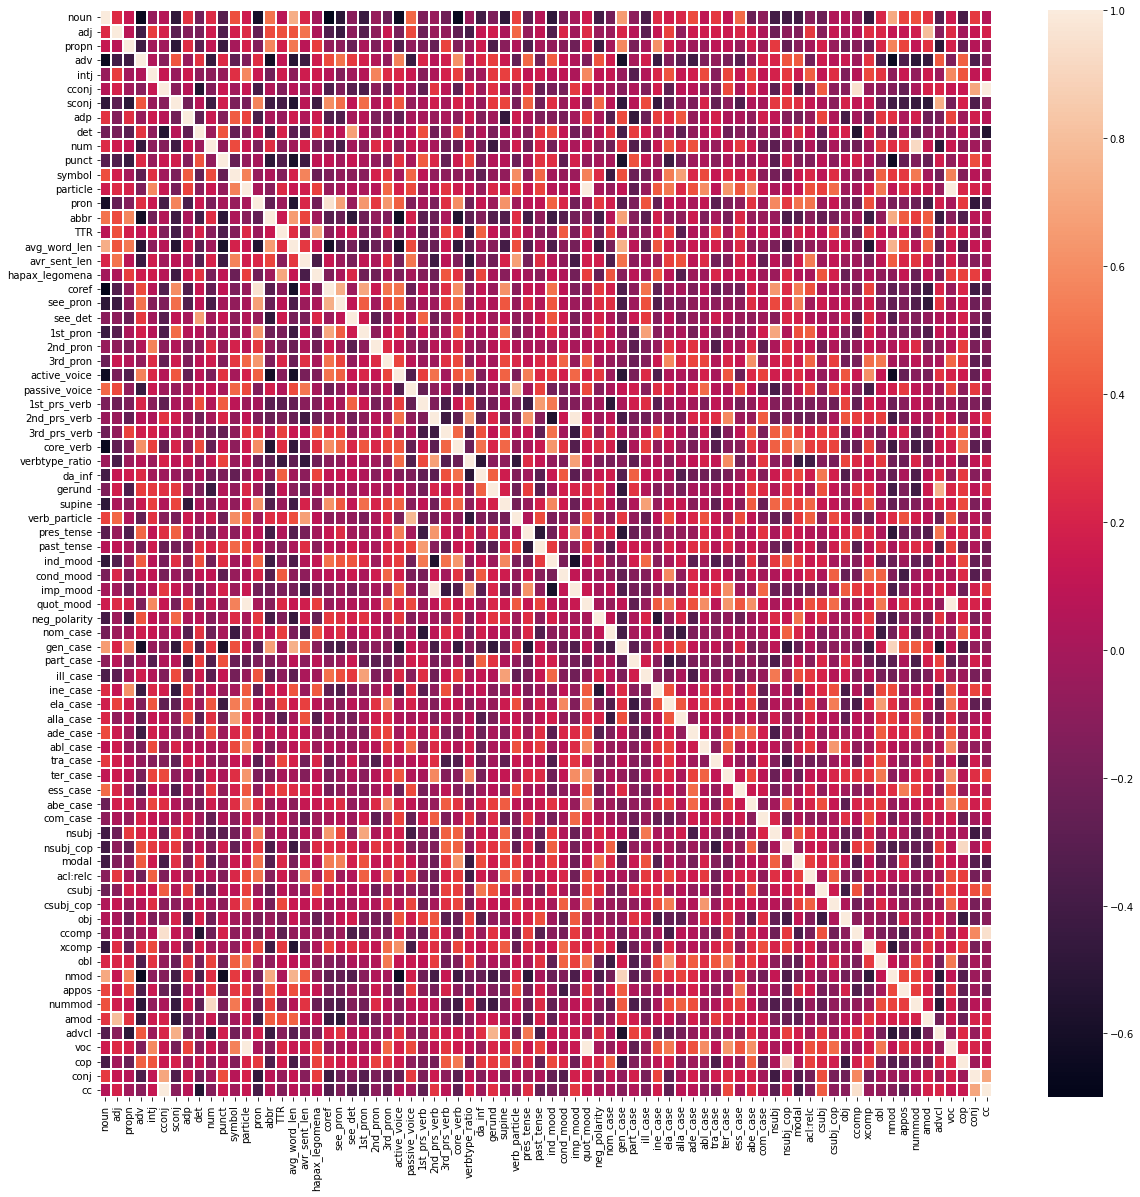

In [41]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(inst_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('inst', inst_df, feature_names)

[[ 0.29930062  0.15202657 -0.36745472 -0.0783025   0.01595314  0.15856693
  -0.03400432 -0.00980796 -0.05706456  0.08470564 -0.00727214  0.01055289
   0.00752813 -0.26108205 -0.01805271 -0.11110732 -0.08465576 -0.15539703
  -0.34838667 -1.3406864  -0.06134984 -0.00494211 -0.04206145  0.00730848
  -0.05668808  0.08066232  0.04492872  0.10298668  0.28631325 -0.28932287
   0.01775625 -0.31164717  0.09485744  0.07069905  0.04753839  0.01751429
   0.41553618 -0.32984818 -0.21930173  0.03816557  0.27055553  0.00166849
   0.04370748 -0.40115676 -0.04947557  0.06547156  0.0578066  -0.10812927
   0.10211801  0.05085207 -0.05076278  0.02706349  0.09087803  0.04065623
   0.00879139  0.01195528 -0.00698892 -0.20955442 -0.06362191  0.00612431
  -0.0259393   0.05666855  0.02256593  0.13597033  0.10712755  0.05002388
   0.04640962 -0.11769981 -0.04410446  0.08121656  0.06000731  0.07075035
   0.00668199 -0.0444553   0.22071811  0.15801899]]


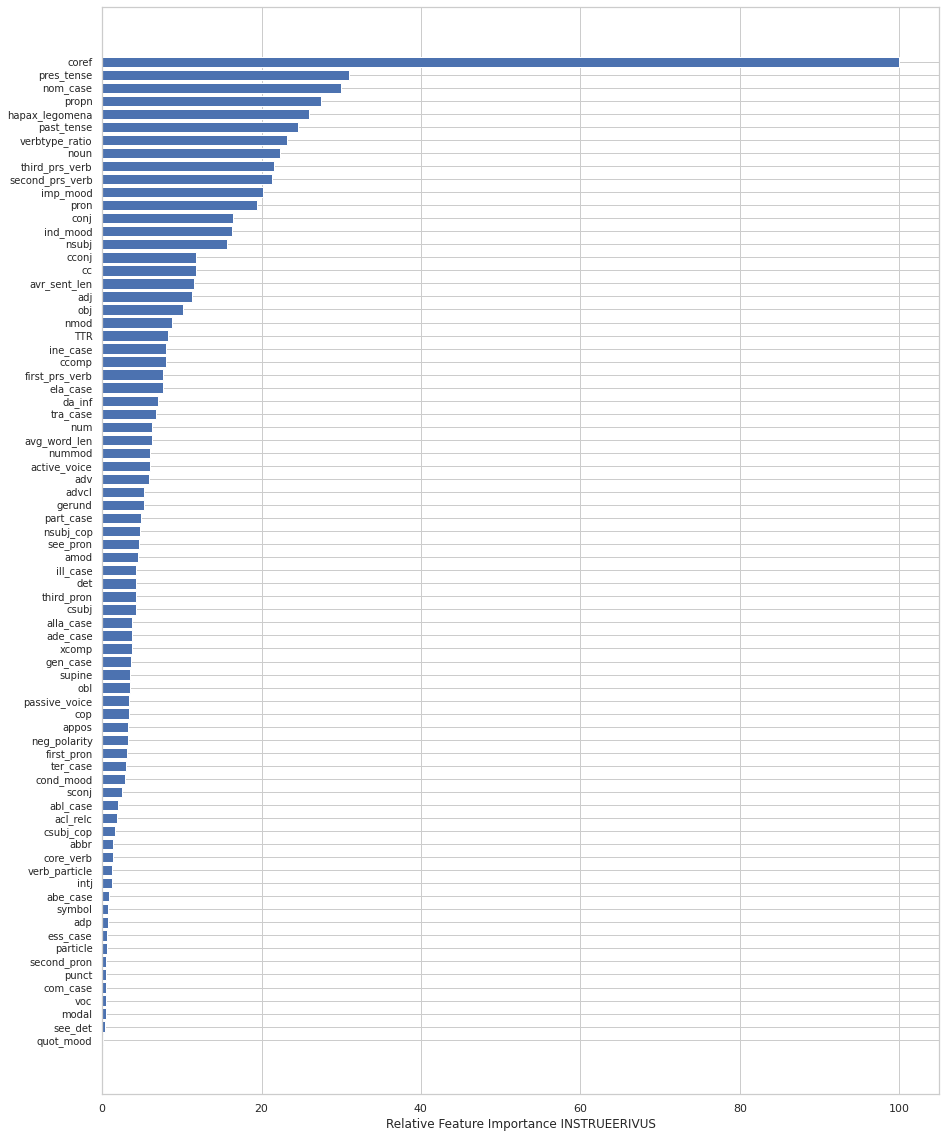

In [274]:
df = initial_df.loc[:, feats + ['inst']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['inst']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'instrueerivus')


In [275]:
log_reg = smf.logit("state ~ coref + pres_tense + nom_case + pron + hapax_legomena + past_tense + verbtype_ratio + noun + third_prs_verb + second_prs_verb + imp_mood + pron", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.262892
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3983
Time:                        18:15:24   Log-Likelihood:                -31.547
converged:                       True   LL-Null:                       -52.427
Covariance Type:            nonrobust   LLR p-value:                 1.782e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4665      4.781      1.353      0.176      -2.904      15.837
coref              -4.7980     11.427     -0.420      0.675     -27.194      17.598
pres_tense         24.2186     17.438      1.389      0.165      -9.959      58.396
nom_case          -12.3049      8.774     -1.402      0.161     -29.501       4.891
pron              -27.9380     50.848     -0.549      0.583    -127.597      71.721
hapax_legomena     -4.3231      3.894     -1.110      0.267     -11.956       3.310
past_tense         -4.4401     13.717     -0.324      0.746     -31.324      22.444
verbtype_ratio     -0.1895      0.360     -0.527      0.598      -0.895       0.516
noun               -7.9046      8.463     -0.934      0.350     -24.492       8.682
third_prs_verb    -29.0064     17.886     -1.622      0.105     -64.062       6.049
second_prs_verb   101.0561    108.404      0.932      0.351    -111.413     313.525
imp_mood          -33.9299    127.403     -0.266      0.790    -283.634     215.775
===================================================================================
"""

## INTERAKTIIVNE

In [43]:
dim = 'inter'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

inter
10 13 96


In [44]:
inter_df, inter_not_df = make_new_df(initial_df, dim, 2)

inter_corr = inter_df.corr(method='pearson').round(2)
save_csv(dim, 'present', inter_corr)
inter_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.44,0.19,-0.33,-0.27,-0.30,-0.10,0.14,0.01,-0.02,...,0.57,0.67,0.32,0.03,0.46,0.28,0.14,-0.25,-0.34,-0.29
adj,0.44,1.00,-0.22,-0.13,0.07,-0.08,-0.11,0.07,-0.23,0.10,...,0.19,0.14,0.00,0.06,0.87,0.12,0.26,-0.00,-0.07,-0.09
propn,0.19,-0.22,1.00,-0.48,0.13,-0.01,0.17,-0.03,0.19,-0.27,...,0.14,0.60,0.89,-0.12,-0.31,-0.14,0.29,-0.23,-0.06,-0.02
adv,-0.33,-0.13,-0.48,1.00,-0.07,0.47,-0.18,-0.09,-0.26,-0.08,...,-0.20,-0.45,-0.38,-0.14,-0.07,-0.38,-0.24,0.33,0.10,0.46
intj,-0.27,0.07,0.13,-0.07,1.00,0.12,0.11,-0.23,-0.26,-0.24,...,-0.02,-0.07,0.14,-0.29,-0.02,0.04,0.40,-0.25,0.02,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.28,0.12,-0.14,-0.38,0.04,-0.42,0.23,0.07,0.28,-0.04,...,0.31,0.17,-0.20,-0.03,0.21,1.00,0.28,-0.19,-0.23,-0.42
voc,0.14,0.26,0.29,-0.24,0.40,0.08,-0.08,0.04,-0.09,-0.32,...,0.29,0.28,0.34,-0.20,0.08,0.28,1.00,-0.06,-0.04,0.07
cop,-0.25,-0.00,-0.23,0.33,-0.25,0.00,-0.20,-0.10,-0.16,0.42,...,-0.30,-0.47,-0.18,0.29,-0.26,-0.19,-0.06,1.00,0.38,0.00
conj,-0.34,-0.07,-0.06,0.10,0.02,0.62,0.16,0.07,0.16,-0.02,...,-0.42,-0.25,-0.11,-0.13,-0.37,-0.23,-0.04,0.38,1.00,0.62


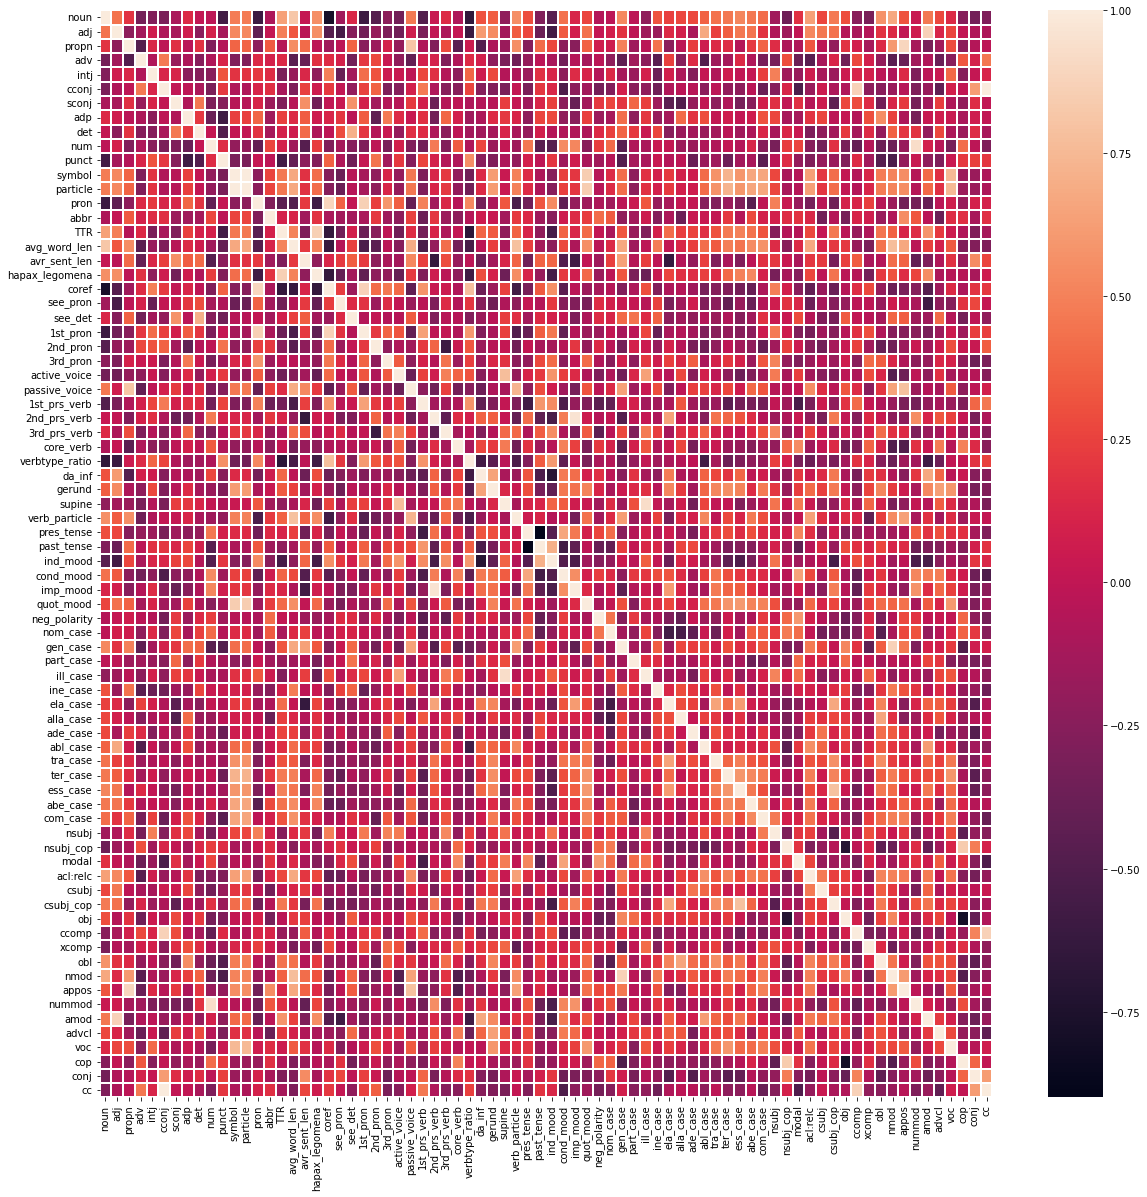

In [45]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(inter_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('inter', inter_df, feature_names)

[[-1.98421661e-01 -1.16296961e-01 -1.26213375e-01  3.46416058e-03
  -1.07811595e-02 -4.96251091e-02 -2.40043728e-02 -6.57589205e-02
   4.10512895e-03  7.73470343e-02  1.37492760e-01 -2.80670936e-02
  -1.91966752e-02 -2.48614519e-03 -1.21021729e-02 -3.02021267e-01
  -1.37055612e+00 -1.68215702e-01 -4.56239299e-01  1.46433182e-01
   7.93560864e-03  3.62162002e-03 -3.35061467e-02 -7.01931491e-04
  -3.11428814e-03  7.18661642e-02 -6.05945900e-02 -2.30661678e-02
  -6.63452266e-03 -3.87223384e-03  4.23404852e-04 -1.72061946e-01
   2.17960869e-02 -4.25056817e-02  6.48767616e-03 -6.29314256e-02
   2.41459115e-02 -3.86572546e-02  7.56511980e-03  4.98781967e-04
   9.18523671e-04 -1.78578450e-02  3.12649250e-02  3.08228175e-02
  -2.86906184e-01  2.44568493e-02 -9.41310698e-03 -2.91091788e-02
  -3.72319003e-02 -2.40053518e-02 -4.59981841e-02 -1.35711080e-02
  -3.66108576e-02 -3.06605869e-02 -1.69348023e-02 -2.77247188e-02
  -4.83211356e-02  2.46067186e-02 -2.20879893e-02  2.18320197e-02
  -4.03348

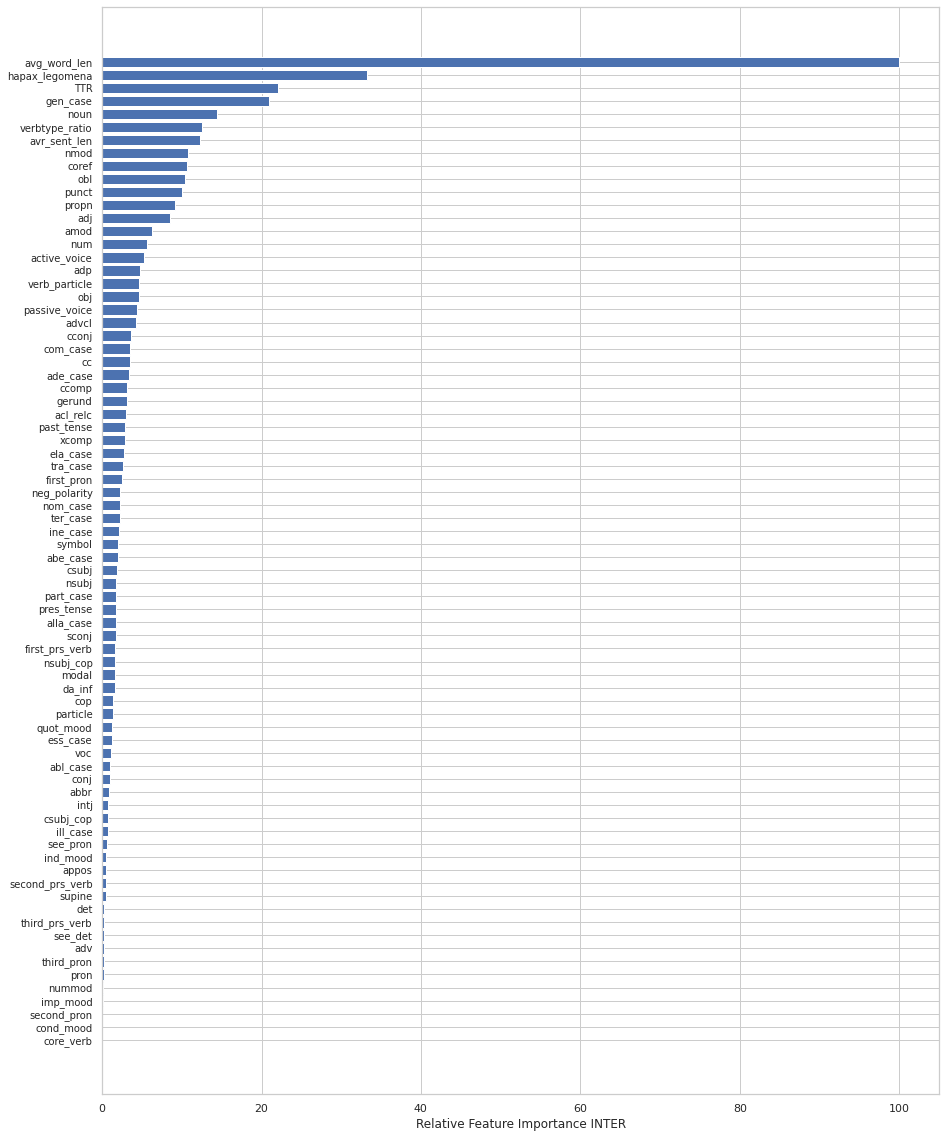

In [276]:
df = initial_df.loc[:, feats + ['inter']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['inter']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'inter')





In [277]:
log_reg = smf.logit("state ~ avg_word_len + hapax_legomena + TTR + gen_case + noun + verbtype_ratio + avr_sent_len", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.184900
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3965
Time:                        18:16:47   Log-Likelihood:                -22.188
converged:                       True   LL-Null:                       -36.765
Covariance Type:            nonrobust   LLR p-value:                 0.0001356
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.8706     10.477      1.897      0.058      -0.664      40.405
avg_word_len      -0.4253      1.219     -0.349      0.727      -2.815       1.964
hapax_legomena    -9.0145     10.268     -0.878      0.380     -29.139      11.110
TTR              -11.6954     15.296     -0.765      0.445     -41.675      18.284
gen_case         -26.1379     13.243     -1.974      0.048     -52.094      -0.181
noun              -1.3955     10.102     -0.138      0.890     -21.194      18.403
verbtype_ratio    -0.6949      0.511     -1.359      0.174      -1.697       0.307
avr_sent_len      -0.2269      0.169     -1.340      0.180      -0.559       0.105
==================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## KEER

In [47]:
dim = 'keer'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

keer
4 27 85


In [48]:
keer_df, keer_not_df = make_new_df(initial_df, dim, 2)

keer_corr = keer_df.corr(method='pearson').round(2)
save_csv(dim, 'present', keer_corr)
keer_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.41,-0.09,-0.67,-0.23,0.07,-0.01,0.27,-0.12,0.13,...,0.22,0.73,0.13,0.21,0.23,0.09,0.33,-0.35,0.12,0.07
adj,0.41,1.00,-0.10,-0.23,0.13,0.27,0.11,-0.03,-0.04,-0.03,...,0.33,0.06,-0.09,0.08,0.82,0.19,0.57,-0.19,0.18,0.27
propn,-0.09,-0.10,1.00,-0.29,-0.19,-0.22,-0.43,-0.05,0.01,-0.02,...,0.19,0.34,0.39,0.03,0.20,-0.31,-0.07,-0.36,-0.17,-0.22
adv,-0.67,-0.23,-0.29,1.00,0.04,-0.05,0.23,-0.34,0.03,-0.09,...,-0.38,-0.53,-0.26,-0.16,-0.23,-0.03,-0.25,0.47,-0.21,-0.05
intj,-0.23,0.13,-0.19,0.04,1.00,0.17,0.16,0.04,-0.11,-0.11,...,0.15,-0.28,-0.02,-0.08,0.02,0.23,0.60,-0.12,-0.06,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.09,0.19,-0.31,-0.03,0.23,-0.17,0.69,0.31,0.21,0.09,...,0.13,-0.17,0.03,0.09,0.25,1.00,0.50,-0.01,-0.32,-0.17
voc,0.33,0.57,-0.07,-0.25,0.60,0.06,0.31,0.32,0.08,0.06,...,0.39,0.05,0.16,0.13,0.41,0.50,1.00,-0.20,-0.15,0.06
cop,-0.35,-0.19,-0.36,0.47,-0.12,-0.02,0.13,-0.23,0.32,0.00,...,-0.58,-0.43,-0.19,-0.06,-0.30,-0.01,-0.20,1.00,0.20,-0.02
conj,0.12,0.18,-0.17,-0.21,-0.06,0.71,-0.40,-0.22,-0.22,0.14,...,-0.39,-0.06,-0.06,0.19,0.07,-0.32,-0.15,0.20,1.00,0.71


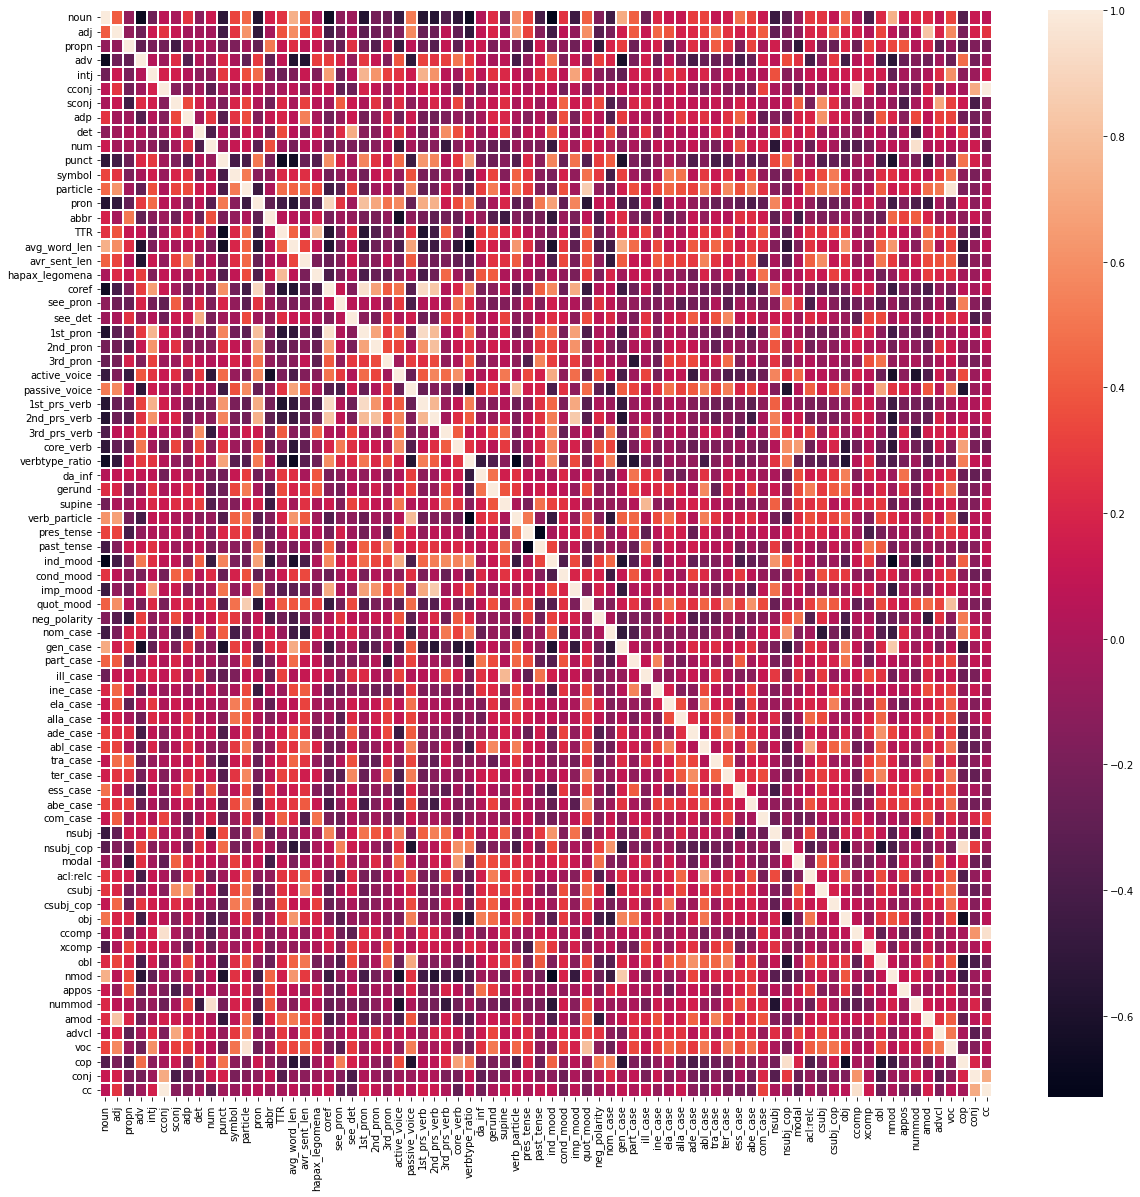

In [49]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(keer_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('keer', keer_df, feature_names)

[[ 7.82185699e-02 -3.40970868e-02  7.06140374e-02 -2.35528480e-02
  -1.40796068e-02 -8.55226413e-02 -5.52102687e-02 -4.85663868e-02
   7.74071747e-03  1.27209582e-01  3.18505319e-02  1.00294267e-04
  -1.15448169e-02 -4.53224381e-02  2.10305643e-01 -6.13332552e-02
   7.54137176e-01 -1.22115294e-02 -3.80743348e-01 -3.27048951e-01
   6.16870225e-04 -8.14646719e-03 -5.50684292e-02 -7.30183355e-03
  -2.11939870e-02 -1.36030688e-01  2.72516281e-02 -4.34941344e-02
  -2.71384716e-02 -6.04014148e-02 -1.64407338e-03 -2.88251146e-01
  -1.72882168e-02 -3.79759008e-02 -4.30227097e-02  2.40006035e-02
   1.04113900e-01 -1.81371790e-01 -9.94855271e-02 -1.92212451e-02
  -1.45905849e-02 -9.48235366e-03  7.42189974e-03  9.63521544e-02
   1.20943311e-01 -1.07972734e-01 -6.10262089e-02 -8.79429865e-02
   2.60528502e-02 -3.08978320e-02 -7.58239095e-02 -5.63379775e-03
  -9.93451742e-03 -1.85592496e-02  2.05856805e-03 -6.72632974e-03
  -2.94621046e-02 -9.06333009e-02 -1.35063290e-02  1.84040601e-02
   2.38377

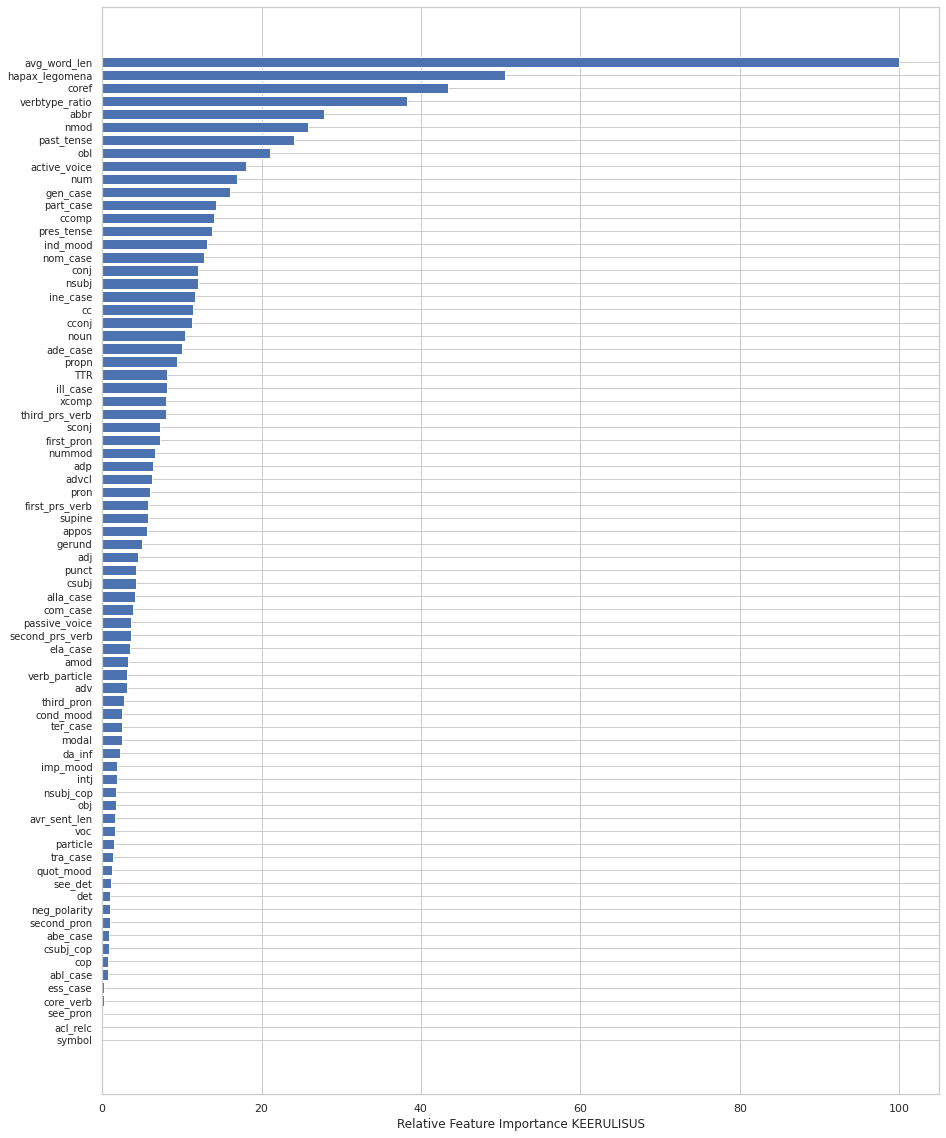

In [278]:
df = initial_df.loc[:, feats + ['keer']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['keer']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'keerulisus')





In [279]:
log_reg = smf.logit("state ~ avg_word_len + coref + hapax_legomena + verbtype_ratio + abbr + nmod + past_tense + obl + active_voice", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.211531
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            9
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3096
Time:                        18:18:25   Log-Likelihood:                -25.384
converged:                       True   LL-Null:                       -36.765
Covariance Type:            nonrobust   LLR p-value:                  0.006751
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.7924      4.630     -0.603      0.546     -11.867       6.282
avg_word_len       0.9997      0.736      1.359      0.174      -0.442       2.441
coref             -0.6990      3.250     -0.215      0.830      -7.069       5.671
hapax_legomena    -8.6486      4.951     -1.747      0.081     -18.352       1.055
verbtype_ratio    -0.3376      0.402     -0.839      0.401      -1.126       0.451
abbr              52.7990     21.672      2.436      0.015      10.323      95.275
nmod              -6.7133      9.345     -0.718      0.473     -25.029      11.602
past_tense       -11.7079     14.829     -0.790      0.430     -40.771      17.356
obl               -3.3911     15.490     -0.219      0.827     -33.751      26.969
active_voice       0.3980     17.274      0.023      0.982     -33.459      34.255
==================================================================================
"""

## SPONT

In [51]:
dim = 'spont'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

spont
7 16 92


In [52]:
spont_df, spont_not_df = make_new_df(initial_df, dim, 2)

spont_corr = spont_df.corr(method='pearson').round(2)
save_csv(dim, 'present', spont_corr)
spont_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.35,-0.13,-0.41,-0.06,-0.12,-0.26,-0.14,-0.01,0.24,...,0.37,0.48,0.11,0.32,0.52,0.02,-0.08,-0.39,-0.06,-0.11
adj,0.35,1.00,-0.13,-0.13,0.48,0.18,-0.14,-0.06,-0.12,0.20,...,-0.06,0.18,0.12,0.29,0.76,-0.01,0.28,0.10,0.09,0.18
propn,-0.13,-0.13,1.00,-0.08,0.16,-0.28,-0.27,-0.12,0.33,0.02,...,0.05,0.14,0.67,0.04,-0.06,-0.04,0.52,-0.07,-0.00,-0.28
adv,-0.41,-0.13,-0.08,1.00,0.19,0.21,0.06,0.22,-0.59,-0.37,...,-0.23,-0.11,0.08,-0.36,0.04,0.01,0.14,0.05,-0.05,0.20
intj,-0.06,0.48,0.16,0.19,1.00,-0.02,0.02,0.13,-0.21,-0.28,...,0.10,0.11,0.32,-0.22,0.35,0.18,0.30,-0.06,-0.18,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.02,-0.01,-0.04,0.01,0.18,-0.59,0.63,0.41,-0.19,-0.17,...,0.09,0.39,-0.15,-0.34,0.17,1.00,0.25,-0.22,-0.49,-0.59
voc,-0.08,0.28,0.52,0.14,0.30,-0.19,-0.17,0.31,0.09,-0.04,...,0.14,0.38,0.40,0.16,0.43,0.25,1.00,-0.11,-0.02,-0.20
cop,-0.39,0.10,-0.07,0.05,-0.06,0.33,-0.02,-0.36,-0.05,0.13,...,-0.46,-0.36,-0.28,0.09,-0.43,-0.22,-0.11,1.00,0.27,0.32
conj,-0.06,0.09,-0.00,-0.05,-0.18,0.63,-0.28,-0.16,0.11,0.22,...,-0.39,-0.36,0.03,0.37,-0.10,-0.49,-0.02,0.27,1.00,0.64


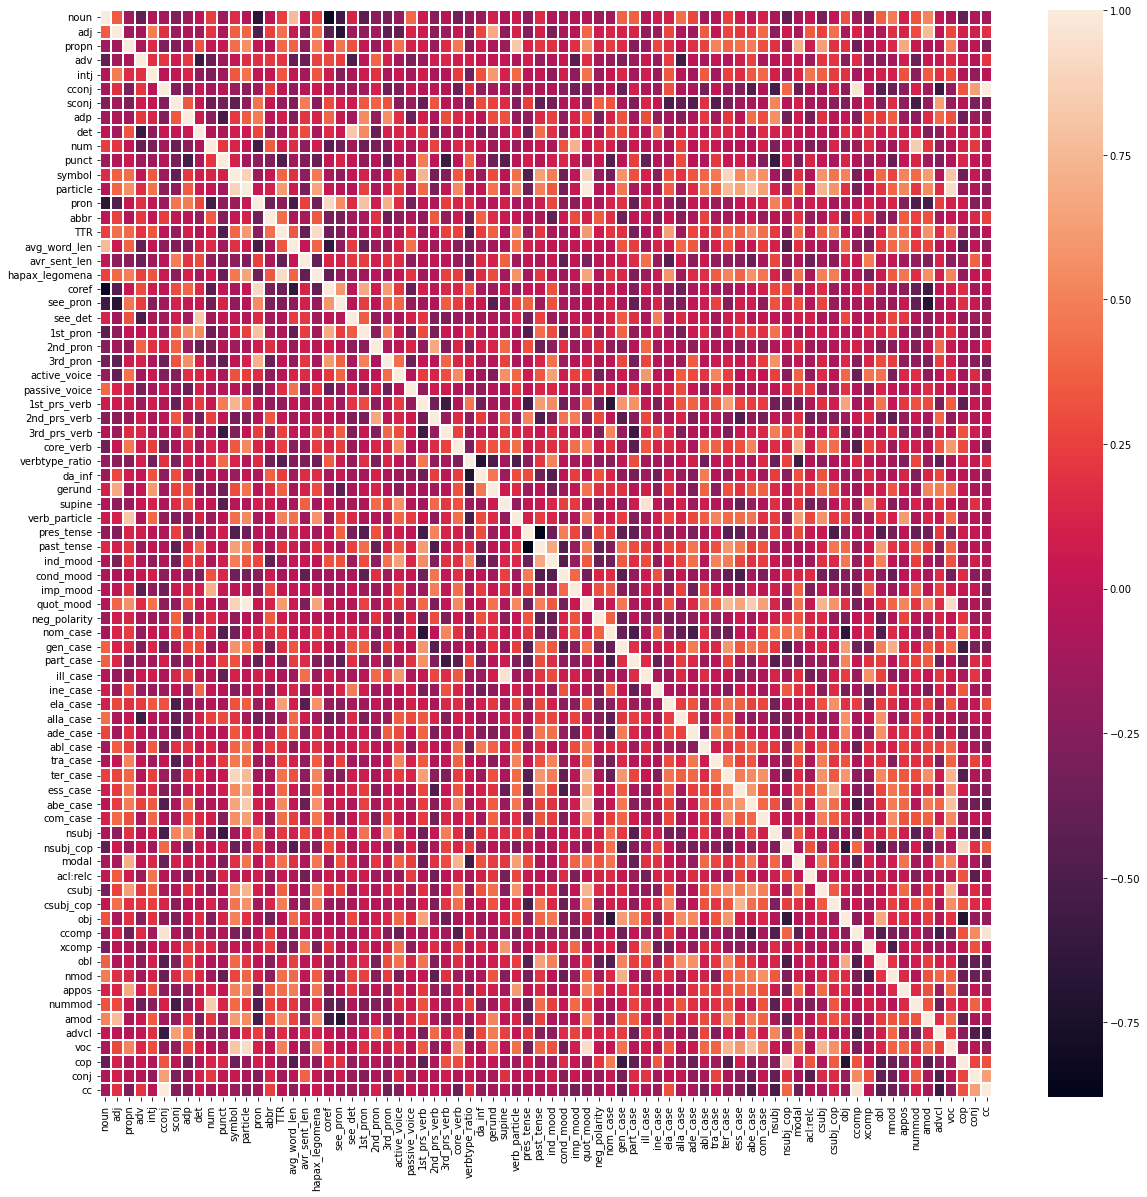

In [53]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(spont_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('spont', spont_df, feature_names)

[[-3.03652991e-01 -1.14175654e-01 -1.96722218e-01  1.82700089e-01
  -4.01779254e-03 -4.13209019e-02  1.12236388e-02  4.70704199e-04
   5.88434061e-02  6.40977082e-02 -4.10115775e-02 -1.93851883e-02
  -9.38505695e-03  9.48454419e-02 -2.43646145e-02 -1.02805534e-01
  -1.93962553e+00 -2.15135846e-01 -5.82945611e-02  8.38373842e-01
   2.65090938e-02  4.81168039e-03  2.69720365e-02  2.67306712e-02
  -1.59479101e-02  1.14382425e-01 -6.61314539e-02 -2.90388847e-02
  -1.01500972e-02 -1.63787320e-02  1.91152674e-01 -1.62866822e-01
   6.24005122e-03 -2.95844504e-02  5.15484640e-02 -6.38478262e-02
   9.37578930e-02 -1.06339775e-01  3.61578254e-02  1.75495723e-02
  -1.65561482e-02 -1.36516857e-02  6.63222900e-02  2.25060568e-01
  -2.58871047e-01 -1.94335609e-02  3.50151774e-02 -4.84027692e-02
  -4.25783037e-02 -6.16003902e-02 -1.22571417e-01 -2.21982529e-02
  -3.77096281e-02 -1.70484021e-02 -2.04908256e-02 -5.51617708e-03
   1.01714069e-02  2.08020050e-02  2.98141996e-02  1.46461935e-01
  -6.73248

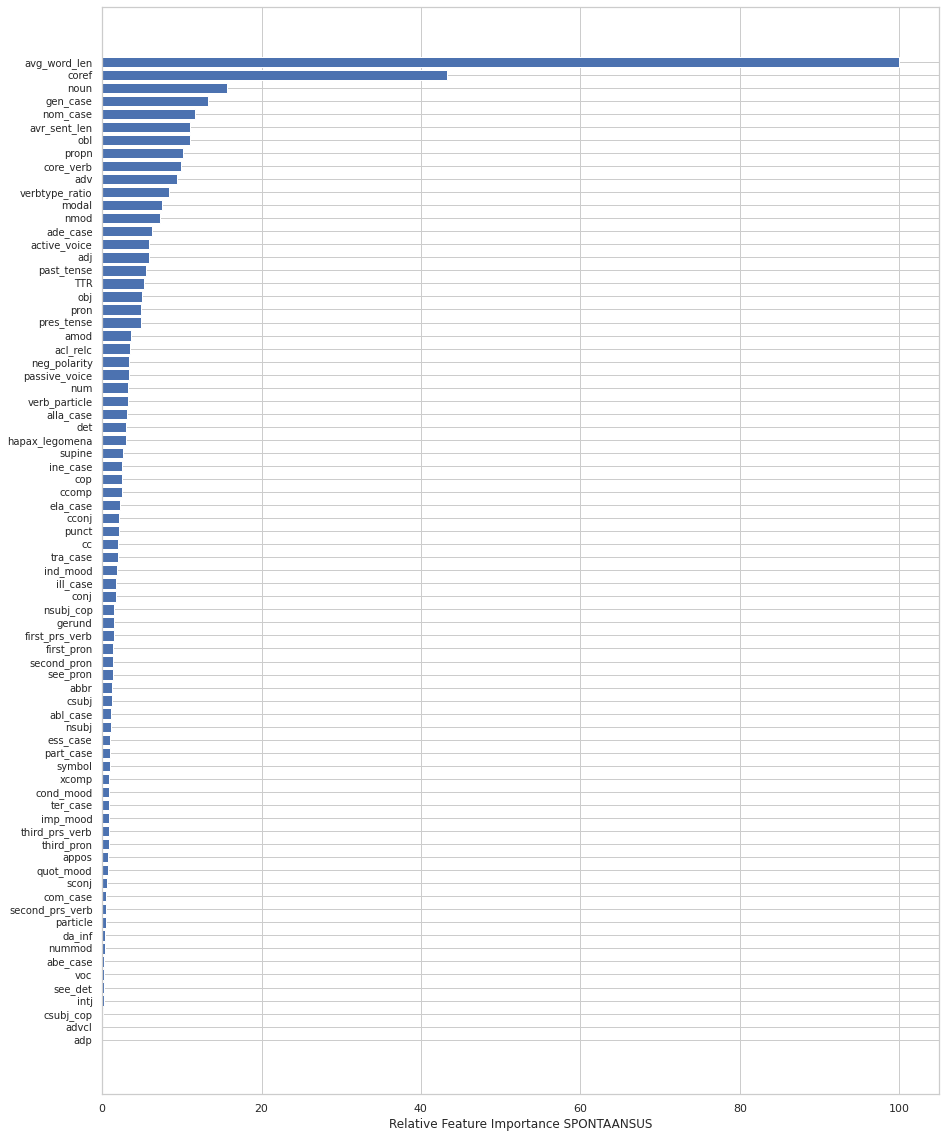

In [280]:
df = initial_df.loc[:, feats + ['spont']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['spont']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'spontaansus')





In [281]:
log_reg = smf.logit("state ~ avg_word_len + coref + noun + gen_case + nom_case + avr_sent_len + obl + propn", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.160160
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            8
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.6074
Time:                        18:20:00   Log-Likelihood:                -19.219
converged:                       True   LL-Null:                       -48.957
Covariance Type:            nonrobust   LLR p-value:                 5.904e-10
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.3194      8.868      1.502      0.133      -4.062      30.701
avg_word_len    -1.2719      1.678     -0.758      0.448      -4.561       2.017
coref           -2.4893      3.192     -0.780      0.435      -8.745       3.766
noun           -47.4422     30.611     -1.550      0.121    -107.438      12.554
gen_case        -2.8896     15.141     -0.191      0.849     -32.564      26.785
nom_case        51.1898     22.299      2.296      0.022       7.485      94.895
avr_sent_len    -0.2306      0.154     -1.498      0.134      -0.532       0.071
obl             -2.4768     29.485     -0.084      0.933     -60.266      55.313
propn          -39.1232     24.385     -1.604      0.109     -86.917       8.671
================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## SUBJ

In [55]:
dim = 'subj'

tugev = len(initial_df.loc[(initial_df[dim] < 3) & (initial_df[dim] > 2), feature_names])
moodukas = len(initial_df.loc[(initial_df[dim] < 2) & (initial_df[dim] > 1), feature_names])
nork = len(initial_df.loc[initial_df[dim] < 1, feature_names])

print(dim)
print(tugev, moodukas, nork)

subj
19 27 71


In [56]:
subj_df, subj_not_df = make_new_df(initial_df, dim, 2)

subj_corr = aeg_df.corr(method='pearson').round(2)
save_csv(dim, 'present', subj_corr)
subj_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.48,0.02,-0.49,-0.03,-0.16,-0.07,0.27,-0.18,0.14,...,0.33,0.64,0.26,0.33,0.46,0.06,0.32,-0.34,-0.12,-0.16
adj,0.48,1.00,0.15,-0.45,0.28,0.25,-0.13,-0.24,-0.15,0.02,...,0.41,0.30,0.14,0.17,0.76,0.06,0.55,0.11,0.11,0.25
propn,0.02,0.15,1.00,-0.52,0.22,-0.12,-0.27,-0.04,-0.22,0.31,...,0.55,0.48,0.57,0.37,0.30,-0.42,0.39,-0.09,-0.25,-0.13
adv,-0.49,-0.45,-0.52,1.00,-0.20,0.00,0.34,-0.06,0.23,-0.44,...,-0.51,-0.52,-0.56,-0.58,-0.37,0.46,-0.41,-0.03,-0.09,0.00
intj,-0.03,0.28,0.22,-0.20,1.00,0.24,-0.04,-0.17,-0.23,0.11,...,0.18,0.15,0.20,0.24,0.29,-0.01,0.77,0.13,0.12,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.06,0.06,-0.42,0.46,-0.01,-0.05,0.55,0.15,0.19,-0.32,...,-0.07,-0.24,-0.23,-0.26,0.04,1.00,0.06,0.07,-0.12,-0.05
voc,0.32,0.55,0.39,-0.41,0.77,0.16,-0.01,-0.03,-0.18,0.25,...,0.46,0.41,0.35,0.48,0.61,0.06,1.00,0.11,0.06,0.15
cop,-0.34,0.11,-0.09,-0.03,0.13,-0.02,0.15,-0.24,0.26,-0.09,...,-0.07,-0.19,-0.02,-0.10,-0.13,0.07,0.11,1.00,-0.10,-0.02
conj,-0.12,0.11,-0.25,-0.09,0.12,0.83,-0.33,-0.25,-0.25,0.14,...,-0.20,-0.32,-0.16,0.13,0.06,-0.12,0.06,-0.10,1.00,0.84


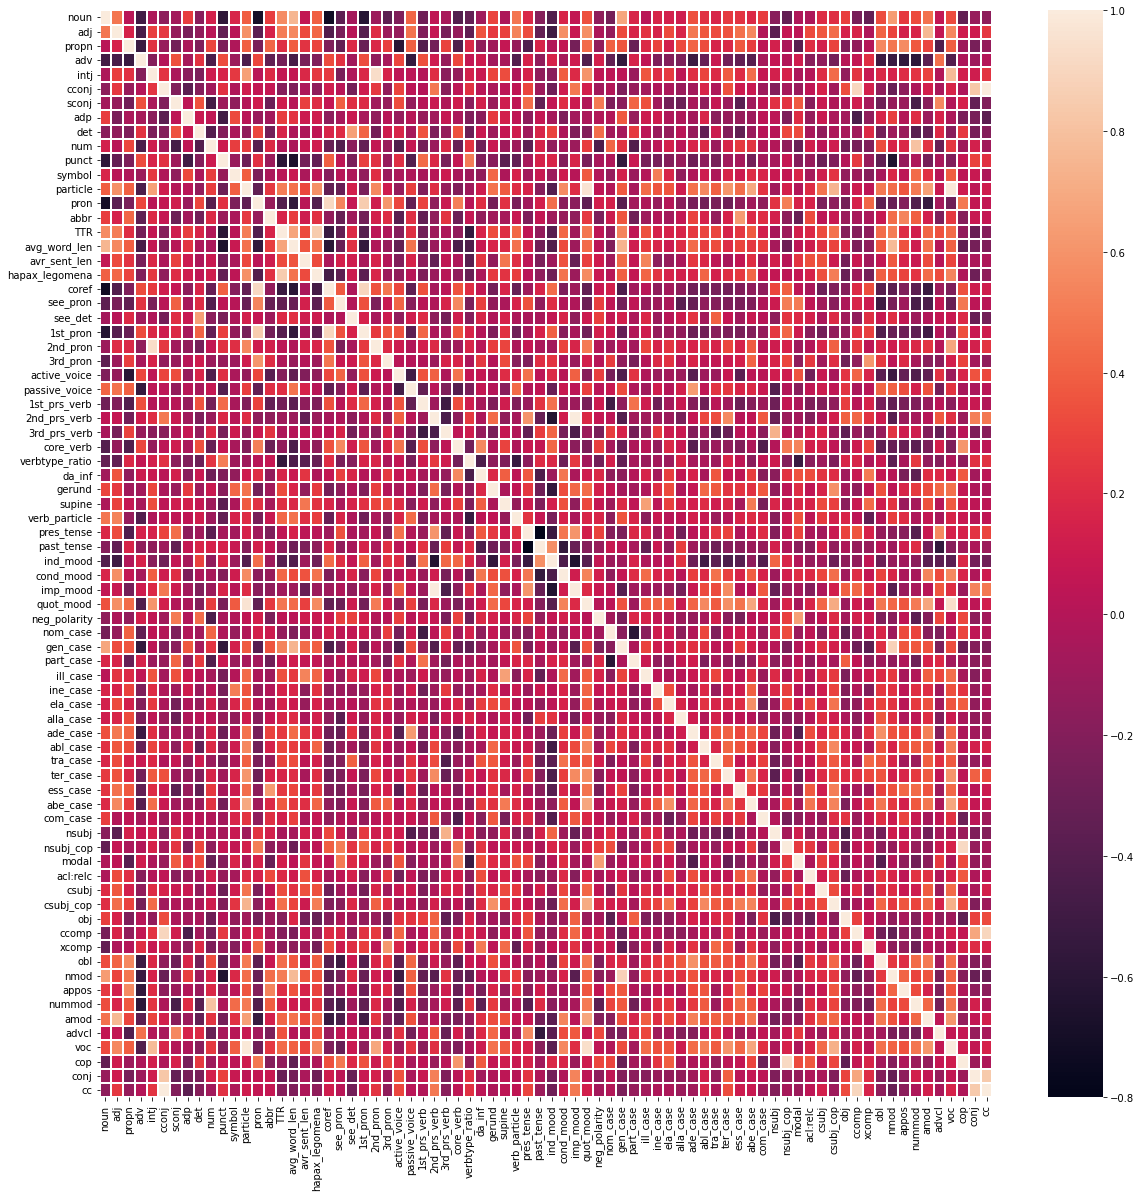

In [57]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap = sns.heatmap(subj_corr, linewidths=0.1, ax=ax)
save_heatmap(hmap, dim)

In [ ]:
generate_plot('subj', subj_df, feature_names)

[[-2.90727211e-01 -1.65417825e-01 -3.20375682e-01  3.39006325e-01
  -1.80052686e-02 -1.67372119e-02  3.54819428e-02 -4.75838432e-03
   7.90717561e-02 -1.43938991e-01 -8.47040386e-02 -4.60503538e-02
  -2.30854961e-02  2.25731411e-01 -8.03799504e-02 -1.36239592e-01
  -1.91911470e+00 -6.68877191e-02 -2.55608490e-01  9.89344346e-01
   5.32392397e-02  1.04702182e-02  1.08711242e-01  6.44976628e-03
  -4.06082934e-02  7.66804210e-02 -8.22789818e-02  4.00466053e-02
  -3.92954273e-02 -8.54780089e-02  1.54502500e-01 -3.47906946e-01
  -3.36742654e-02 -5.95877048e-02 -1.95830282e-02 -3.04635613e-02
  -4.47782673e-02  3.58491961e-02  2.72992869e-02  8.48109763e-03
  -5.21283514e-02 -3.07030499e-02  6.19750093e-02  1.07941794e-02
  -9.74971040e-02 -8.42279574e-03 -2.18344425e-02 -5.91820732e-02
  -7.38901649e-02 -4.89732132e-02 -1.24815381e-01 -4.75579107e-02
  -5.60358435e-02 -3.23902782e-02 -5.01363053e-04 -3.87649199e-02
  -2.02829943e-02  2.42255995e-03 -1.01352249e-02  7.68476318e-02
  -5.70052

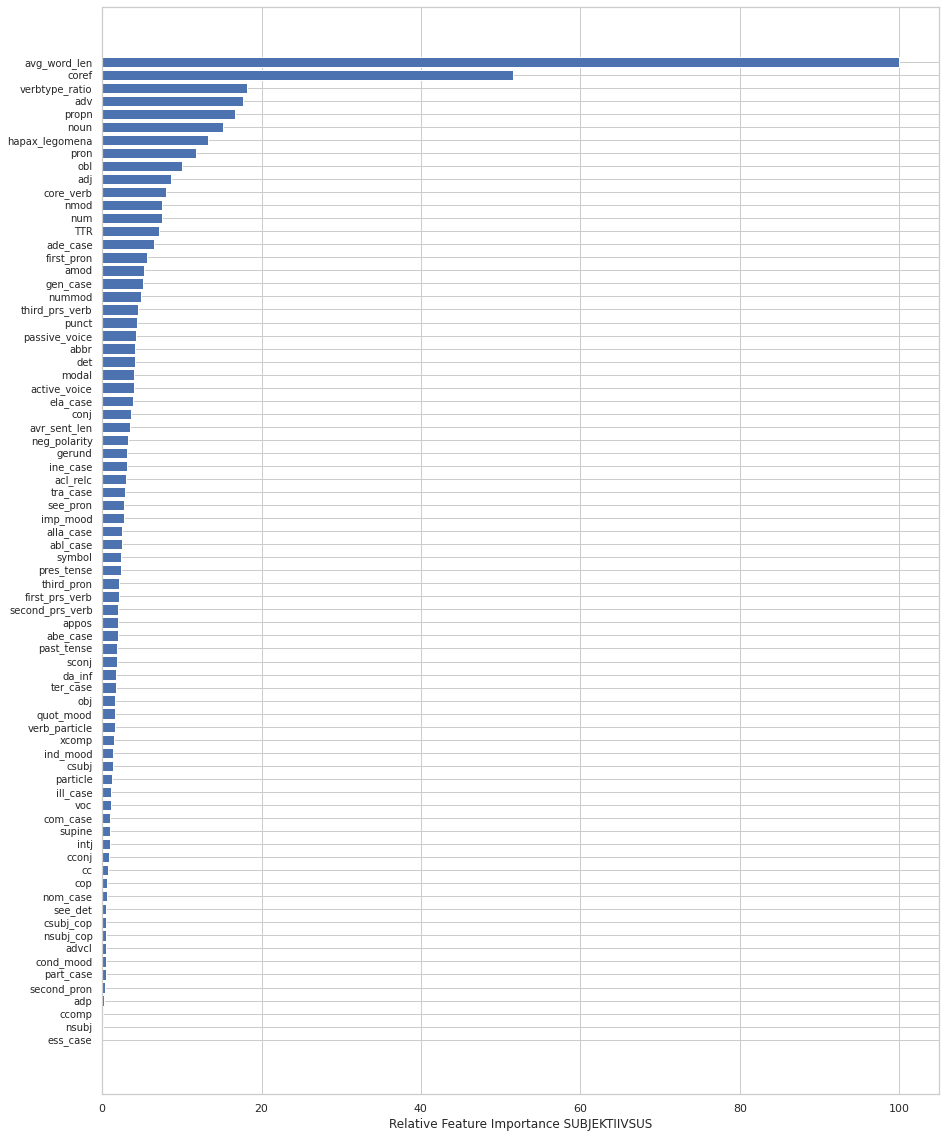

In [282]:
df = initial_df.loc[:, feats + ['subj']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['subj']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'subjektiivsus')





In [283]:
log_reg = smf.logit("state ~ avg_word_len + coref + verbtype_ratio + adv + propn + noun", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.325845
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  state   No. Observations:                  120
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.4296
Time:                        18:21:02   Log-Likelihood:                -39.101
converged:                       True   LL-Null:                       -68.557
Covariance Type:            nonrobust   LLR p-value:                 7.490e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.4271      5.180      1.434      0.152      -2.725      17.579
avg_word_len      -1.5216      0.927     -1.642      0.101      -3.338       0.295
coref              1.1055      2.055      0.538      0.591      -2.922       5.133
verbtype_ratio    -0.1538      0.331     -0.464      0.642      -0.803       0.495
adv               16.1482     10.352      1.560      0.119      -4.140      36.437
propn            -13.7240      9.396     -1.461      0.144     -32.139       4.691
noun              -5.7997     11.127     -0.521      0.602     -27.609      16.009
==================================================================================
"""